# Data Context
**For my thesis I will use the The Open University Learning Analytics Dataset (OULAD) https://analyse.kmi.open.ac.uk/open-dataset. This is a dataset provided by The Open University, containing learning interactions and demographic information for students enrolled in seven different modules. The dataset includes student engagement with the Virtual Learning Environment(VLE) across multiple course presentations, recorded as interactions with learning materials, assessment results, registration information and student demographic information.The instances will be used to predict wether a student is going to pass or is at-risk for dropping out or failing. Some more information to understand the columns of the datasets will be provided when doing the analysis. This text will be a dirct copy form the source, which is Kuzilek J., Hlosta M., Zdrahal Z. Open University Learning Analytics dataset Sci. Data 4:170171 doi: 10.1038/sdata.2017.171 (2017) and will be shown as [1]**
<!-- **In this section you should introduce the datasources and datasets which you will be working with. Explain where they are from as well as their domain. Give an overview of what the context of the data is. You should not spend more than 1 to 2 paragraphs here as the core information will be in the next section.** -->

# Data Description
The goal of this EDA is to get a better understanding of the data, preprocess it and make some decisions for the eventual dataset based on what I come across. In the end of this I want to have a transformed dataset that can be used in the RL-MIL framework from my main paper (Ziabari et. al., 2024) directly. their framework is my baseline and also the framework I will adjusst to create my own framework, which is an RL-MIL framework that uses an attention component to select the most important instances. 
The most important thing to keep in mind for my research is that I am going to use Multiple instance Learning (MIL) and thus need a dataset that correctly includes all the instances per student. In the EDA I will thouroughly go over all seperate csv files in the OULAD dataset, analyse them and combine all datasets to create one dataset that contains all bags of students and their instances of learning interactions. 

For better understanding this is the mathametical explanation of the student performance predication as a MIL problem. Each student is represented as a bag, and their learning interactions (e.g., quizzes, assignments, and VLE activities) serve as instances. 
Let 
\begin{equation}
    \mathcal{D} = \{B_i, y_i\}_{i=1}^{N}
\end{equation}

be the dataset, where:

\begin{equation}
    B_i = \{x_{i1}, x_{i2}, \dots, x_{iM}\} \mathrm{\space represents \space the \space bag \space of \space instances \space corresponding \space to \space student \space} i
\end{equation}

Each instance \( x_{ij} \) represents a learning interaction (e.g., quiz result, assignment, VLE activity).

The binary label is defined as:

\begin{equation}
    y_i \in \{0,1\} \mathrm{\space where \space}
    \begin{cases} 
        y_i = 1 & \mathrm{\space if \space the \space student \space is \space predicted \space to \space pass \space the \space course} \\
        y_i = 0 & \mathrm{\space if \space the \space student \space is \space at \space risk \space (failing \space or \space dropping \space out)}
    \end{cases}
\end{equation}


<!-- **Present here the results of your exploratory data analysis. Note that there is no need to have a "story line" - it is more important that you show your understanding of the data and the methods that you will be using in your experiments (i.e. your methodology).**

**As an example, you could show data, label, or group balances, skewness, and basic characterizations of the data. Information about data frequency and distributions as well as results from reduction mechanisms such as PCA could be useful. Furthermore, indicate outliers and how/why you are taking them out of your samples, if you do so.**

**The idea is, that you conduct this analysis to a) understand the data better but b) also to verify the shapes of the distributions and whether they meet the assumptions of the methods that you will attempt to use. Finally, make good use of images, diagrams, and tables to showcase what information you have extracted from your data.**

As you can see, you are in a jupyter notebook environment here. This means that you should focus little on writing text and more on actually exploring your data. If you need to, you can use the amsmath environment in-line: $e=mc^2$ or also in separate equations such as here:

\begin{equation}
    e=mc^2 \mathrm{\space where \space} e,m,c\in \mathbb{R}
\end{equation}

Furthermore, you can insert images such as your data aggregation diagrams like this:

![image](example.png) -->

## File structure
For the clarity of the file I will have the following subsections.
1. Imports
2. Analysis on courses dataframe 
   - Data loading
   - Basic information
   - Understanding of columns
   - Distributions
   - Missing values & duplicates
3. Analysis on assessments dataframe
   - Data loading
   - Basic information
   - Understanding of columns
   - Distributions
   - Missing values & duplicates
4. Analysis on student info dataframe
   - Data loading
   - Basic information
   - Understanding of columns
   - Distributions
   - Missing values & duplicates
5. Analysis on student registration daraframe
   - Data loading
   - Basic information
   - Understanding of columns
   - Distributions
   - Missing values & duplicates
6. Analysis on student assessment dataframe
   - Data loading
   - Basic information
   - Understanding of columns
   - Distributions
   - Missing values & duplicates
7. Analysis on vle dataframe
   - Data loading
   - Basic information
   - Understanding of columns
   - Distributions
   - Missing values & duplicates
8. Analysis on student vle dataframe
   - Data loading
   - Basic information
   - Understanding of columns
   - Distributions
   - Missing values & duplicates
9. Creation of new dataset

### Imports

In [1]:
import numpy as np
import pandas as pd
import os
from IPython.display import display
import matplotlib.pyplot as plt
import seaborn as sns
import json

### Data loading

In [2]:
courses_df = pd.read_csv("../data/raw/courses.csv")
assessments_df = pd.read_csv("../data/raw/assessments.csv")
studentRegistration_df = pd.read_csv("../data/raw/studentRegistration.csv")
studentInfo_df = pd.read_csv("../data/raw/studentInfo.csv")
studentAssessment_df = pd.read_csv("../data/raw/studentAssessment.csv")
vle_df = pd.read_csv("../data/raw/vle.csv")
studentVle_df = pd.read_csv("../data/raw/studentVle.csv")

<!-- ## Analysis on courses dataframe -->

## Anlaysis on courses dataframe

#### Data loading

In [3]:
# courses_df = pd.read_csv("../data/courses.csv")

#### Basic information

In [4]:
# Basic information and overview
print("Basic Information:")
print(courses_df.head())
print(courses_df.info())

Basic Information:
  code_module code_presentation  module_presentation_length
0         AAA             2013J                         268
1         AAA             2014J                         269
2         BBB             2013J                         268
3         BBB             2014J                         262
4         BBB             2013B                         240
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22 entries, 0 to 21
Data columns (total 3 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   code_module                 22 non-null     object
 1   code_presentation           22 non-null     object
 2   module_presentation_length  22 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 656.0+ bytes
None


#### Understanding of columns [1]

The file contains the list of all available modules and their presentations. The columns are:
- code_module: code name of the module, which serves as the identifier.
- code_presentation: code name of the presentation. It consists of the year and "B" for the presentation starting in February and "J" for the presentation starting in October.
- length: length of the module-presentation in days.
<!-- The structure of B and J presentations may differ and therefore it is good practice to analyse the B and J presentations separately. Nevertheless, for some presentations the corresponding previous B/J presentation do not exist and therefore the J presentation must be used to inform the B presentation or vice versa. In the dataset this is the case of CCC, EEE and GGG modules. -->

#### Distributions

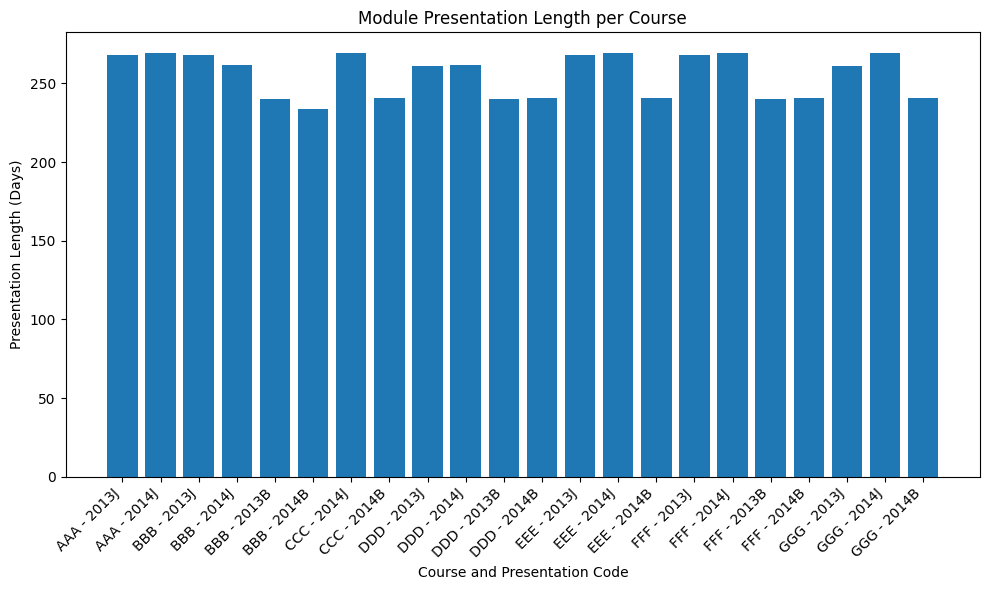

In [5]:
# Plot module presentation lenght per course-presentation combination
plt.figure(figsize=(10, 6))
plt.bar(courses_df['code_module'] + " - " + courses_df['code_presentation'], 
        courses_df['module_presentation_length'])
plt.title('Module Presentation Length per Course')
plt.xlabel('Course and Presentation Code')
plt.ylabel('Presentation Length (Days)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

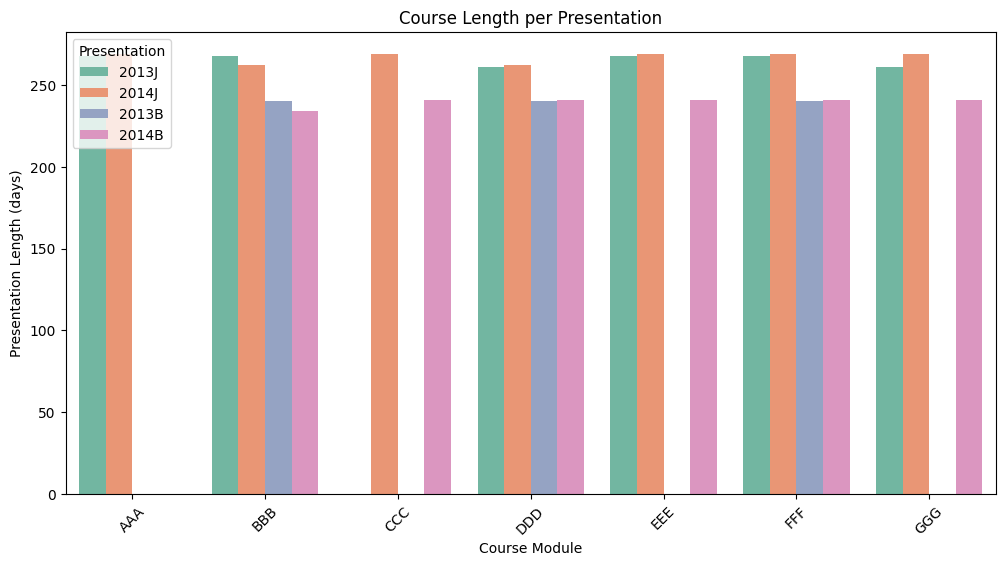

In [6]:
# Group the data to get the length of each course-presentation combination
course_lengths = courses_df.groupby(['code_module', 'code_presentation'])['module_presentation_length'].mean().reset_index()

# Bar Plot - Course Length per Presentation
plt.figure(figsize=(12, 6))
sns.barplot(data=course_lengths, x='code_module', y='module_presentation_length', hue='code_presentation', palette='Set2')
plt.title('Course Length per Presentation')
plt.xlabel('Course Module')
plt.ylabel('Presentation Length (days)')
plt.xticks(rotation=45)
plt.legend(title='Presentation')
plt.show()

Not all courses are given in every presentation. Courses BBB, DDD and FFF are, course AAA is only given starting in oktober(J), course CCC has only been given in 2014 and course EEE and GGG have been given in oktober of 2013 and October and Febuary of 2014. I should keep this in mind because this might mean the distribution of students is different over the courses and presentations.

In [7]:
# Statistical Summary per Presentation
presentation_summary = courses_df.groupby('code_presentation')['module_presentation_length'].describe()
print("Statistical Summary of Course Lengths per Presentation:")
print(presentation_summary)

# Create a new column for presentation type (J or B)
courses_df['presentation_type'] = courses_df['code_presentation'].str[-1]
# Statistical Summary per Presentation Type (J or B)
presentation_type_summary = courses_df.groupby('presentation_type')['module_presentation_length'].describe()
print("Statistical Summary of Course Lengths per Presentation Type (J/B):")
print(presentation_type_summary)

# Statistical Summary per Module
module_summary = courses_df.groupby('code_module')['module_presentation_length'].describe()

print("Statistical Summary of Course Lengths per Module:")
print(module_summary)


Statistical Summary of Course Lengths per Presentation:
                   count        mean       std    min     25%    50%    75%  \
code_presentation                                                             
2013B                3.0  240.000000  0.000000  240.0  240.00  240.0  240.0   
2013J                6.0  265.666667  3.614784  261.0  262.75  268.0  268.0   
2014B                6.0  239.833333  2.857738  234.0  241.00  241.0  241.0   
2014J                7.0  267.000000  3.415650  262.0  265.50  269.0  269.0   

                     max  
code_presentation         
2013B              240.0  
2013J              268.0  
2014B              241.0  
2014J              269.0  
Statistical Summary of Course Lengths per Presentation Type (J/B):
                   count        mean       std    min    25%    50%    75%  \
presentation_type                                                            
B                    9.0  239.888889  2.260777  234.0  240.0  241.0  241.0   
J     

Presentation 2013J has a consistent lenght of 240 days, the other presentations have a difference of 7 days/ one week. I take note in that the presentations in Febuary have a shorter lenght (234-241 days) than the courses in October (261-269 days). This difference of 27-28 days (3 weeks) might have an influence on both the students understanding of the course, more time mostly equals more understanding, and the number of assessments in the course.

In [8]:
# presentation lenght statistics
mean_length = courses_df['module_presentation_length'].mean()
median_length = courses_df['module_presentation_length'].median()
std_dev = courses_df['module_presentation_length'].std()
variance = courses_df['module_presentation_length'].var()
min_length = courses_df['module_presentation_length'].min()
max_length = courses_df['module_presentation_length'].max()

print("Basic Summary:")
print(f"\nMean Presentation Length: {mean_length:.2f}")
print(f"Median Presentation Length: {median_length:.2f}")
print(f"Standard Deviation: {std_dev:.2f}")
print(f"Variance: {variance:.2f}")
print(f"Minimum Presentation Length: {min_length}")
print(f"Maximum Presentation Length: {max_length}")


Basic Summary:

Mean Presentation Length: 255.55
Median Presentation Length: 261.50
Standard Deviation: 13.65
Variance: 186.45
Minimum Presentation Length: 234
Maximum Presentation Length: 269


#### Missing values and duplicates

In [9]:
print(f"Missing Values: {courses_df['module_presentation_length'].isnull().sum()}")

Missing Values: 0


In [10]:
# Check for any duplicate rows
duplicates = courses_df.duplicated()

if duplicates.any():
    print(f"Number of duplicate rows: {duplicates.sum()}")
    print("\nDuplicate rows:")
    print(courses_df[duplicates])
else:
    print("No duplicate rows found.")


No duplicate rows found.


## Analysis of assessments dataframe

#### Data loading

In [11]:
# assessments_df = pd.read_csv("../data/assessments.csv")

#### Basic information

In [12]:
# Basic information and overview
print("Basic Information:")
print(assessments_df.head())
print(assessments_df.info())

Basic Information:
  code_module code_presentation  id_assessment assessment_type   date  weight
0         AAA             2013J           1752             TMA   19.0    10.0
1         AAA             2013J           1753             TMA   54.0    20.0
2         AAA             2013J           1754             TMA  117.0    20.0
3         AAA             2013J           1755             TMA  166.0    20.0
4         AAA             2013J           1756             TMA  215.0    30.0
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 206 entries, 0 to 205
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   code_module        206 non-null    object 
 1   code_presentation  206 non-null    object 
 2   id_assessment      206 non-null    int64  
 3   assessment_type    206 non-null    object 
 4   date               195 non-null    float64
 5   weight             206 non-null    float64
dtypes: float64(2), int64

#### Understanding of columns [1]

This file contains information about assessments in module-presentations. Usually, every presentation has a number of assessments followed by the final exam. CSV contains columns:
- code_module: identification code of the module, to which the assessment belongs.
- code_presentation: identification code of the presentation, to which the assessment belongs.
- id_assessment: identification number of the assessment.
- assessment_type: type of assessment. Three types of assessments exist: Tutor Marked Assessment (TMA), Computer Marked Assessment (CMA) and Final Exam (Exam).
- date: information about the final submission date of the assessment calculated as the number of days since the start of the module-presentation. The starting date of the presentation has number 0 (zero).
- weight: weight of the assessment in %. Typically, Exams are treated separately and have the weight 100%; the sum of all other assessments is 100%.

If the information about the final exam date is missing, it is at the end of the last presentation week.

#### Distributions

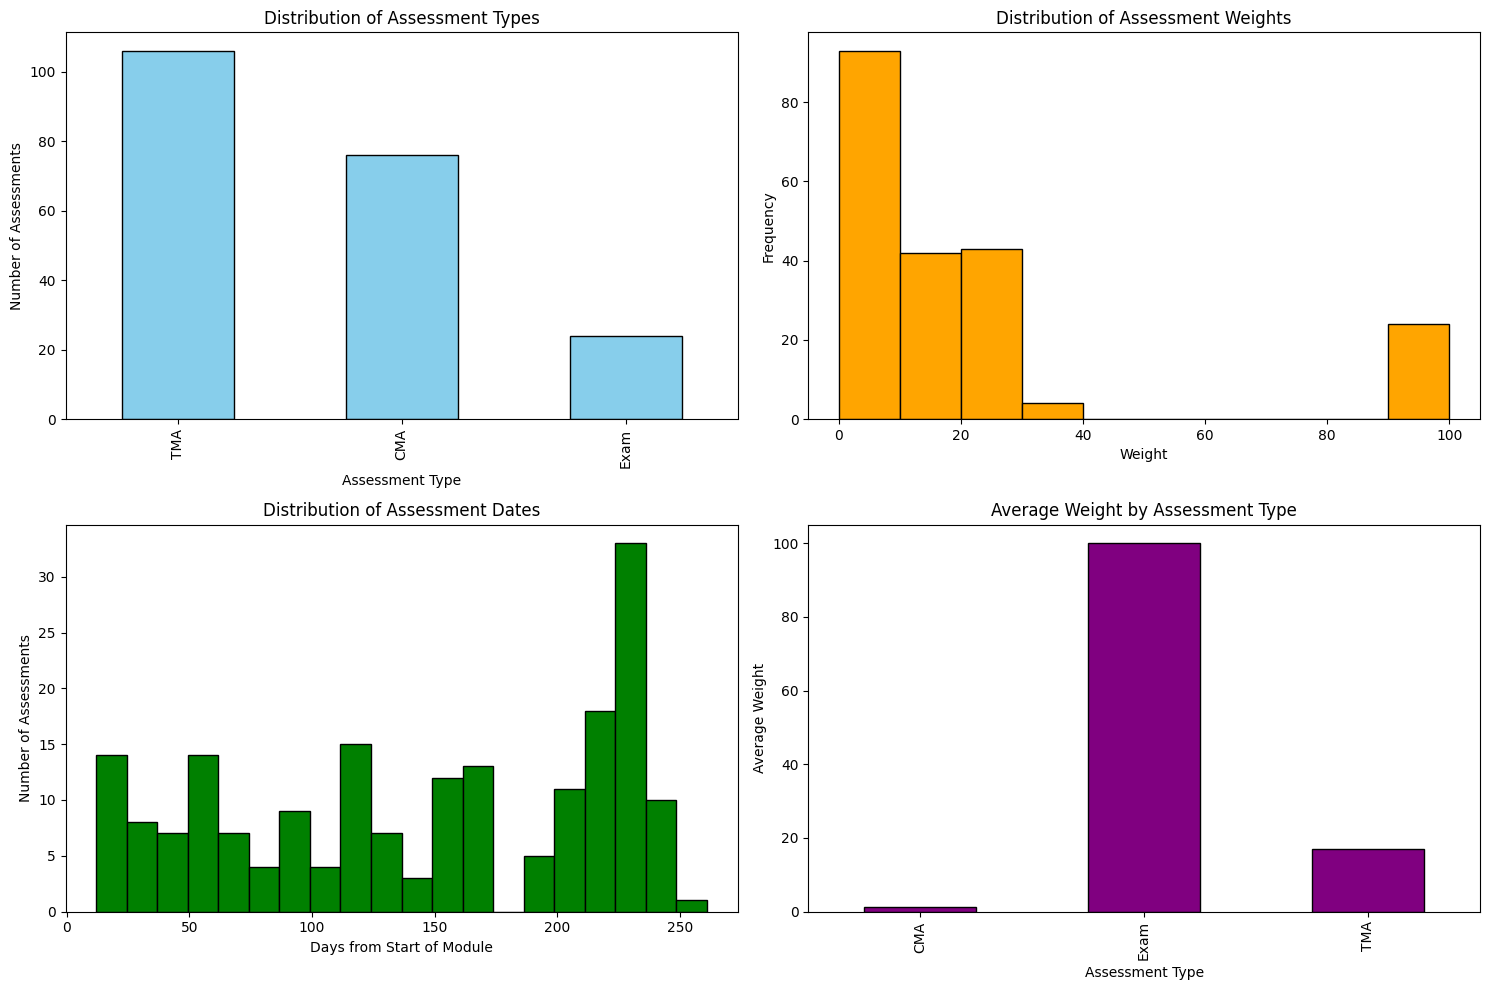

In [13]:
# Create a single figure with subplots (2x2 layout)
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# Plot 1: Distribution of Assessment Types
assessments_df['assessment_type'].value_counts().plot(kind='bar', ax=axes[0, 0], color='skyblue', edgecolor='black')
axes[0, 0].set_title('Distribution of Assessment Types')
axes[0, 0].set_xlabel('Assessment Type')
axes[0, 0].set_ylabel('Number of Assessments')

# Plot 2: Distribution of Assessment Weights
axes[0, 1].hist(assessments_df['weight'], bins=10, color='orange', edgecolor='black')
axes[0, 1].set_title('Distribution of Assessment Weights')
axes[0, 1].set_xlabel('Weight')
axes[0, 1].set_ylabel('Frequency')

# Plot 3: Distribution of Assessment Dates
axes[1, 0].hist(assessments_df['date'].dropna(), bins=20, color='green', edgecolor='black')
axes[1, 0].set_title('Distribution of Assessment Dates')
axes[1, 0].set_xlabel('Days from Start of Module')
axes[1, 0].set_ylabel('Number of Assessments')

# Plot 4: Average Weight by Assessment Type
assessments_df.groupby('assessment_type')['weight'].mean().plot(kind='bar', ax=axes[1, 1], color='purple', edgecolor='black')
axes[1, 1].set_title('Average Weight by Assessment Type')
axes[1, 1].set_xlabel('Assessment Type')
axes[1, 1].set_ylabel('Average Weight')

# Adjust layout and spacing
plt.tight_layout()
plt.show()


In [14]:
course_stats = assessments_df.groupby(['code_module', 'code_presentation']).agg({
    'weight': ['mean', 'sum', 'max', 'min', 'count'],
    'date': ['mean', 'max', 'min']
}).reset_index()

print(course_stats)


   code_module code_presentation     weight                            \
                                       mean    sum    max   min count   
0          AAA             2013J  33.333333  200.0  100.0  10.0     6   
1          AAA             2014J  33.333333  200.0  100.0  10.0     6   
2          BBB             2013B  16.666667  200.0  100.0   1.0    12   
3          BBB             2013J  16.666667  200.0  100.0   1.0    12   
4          BBB             2014B  16.666667  200.0  100.0   1.0    12   
5          BBB             2014J  33.333333  200.0  100.0   0.0     6   
6          CCC             2014B  30.000000  300.0  100.0   2.0    10   
7          CCC             2014J  30.000000  300.0  100.0   2.0    10   
8          DDD             2013B  14.285714  200.0  100.0   2.0    14   
9          DDD             2013J  28.571429  200.0  100.0  10.0     7   
10         DDD             2014B  28.571429  200.0  100.0  10.0     7   
11         DDD             2014J  28.571429  200.0 

Exams are typically worth a weight of 100 and the other assessments combined too. Practically this means out of all the grades the exam is worth 50% of the final grade. I notice that courses AAA, BBB, DDD, EEE and FFF indeed have a total weight of 200. Course CCC has a total weight of 300, which probably means this course works with more assessments. Practically this means the exam is not worth 50%, but 33.33%. Course GGG has a total weight of 100 which indicates that their is either no exam or no other weighted assessments. 

<!-- This is very important to keep in mind when setting up the model. Since the model might want to make conclusions on the number of assessments, for example if a student has withdrawn themselves after the first assessment, they have the same number of assessments, but the student that took the exam (and has a good grade) has to be predicted to pass and the student who has withdrawn has to be predicted to be at-risk. 
 -->
For the dates we see the range for the first assessment is in between day 12-61 and the range for the last assessment is in between day 187-261. Since the description already mentioned that there are some missing dates for the exams, I assume those are in the courses where the max assessment date is not in the last two weeks of the course. 

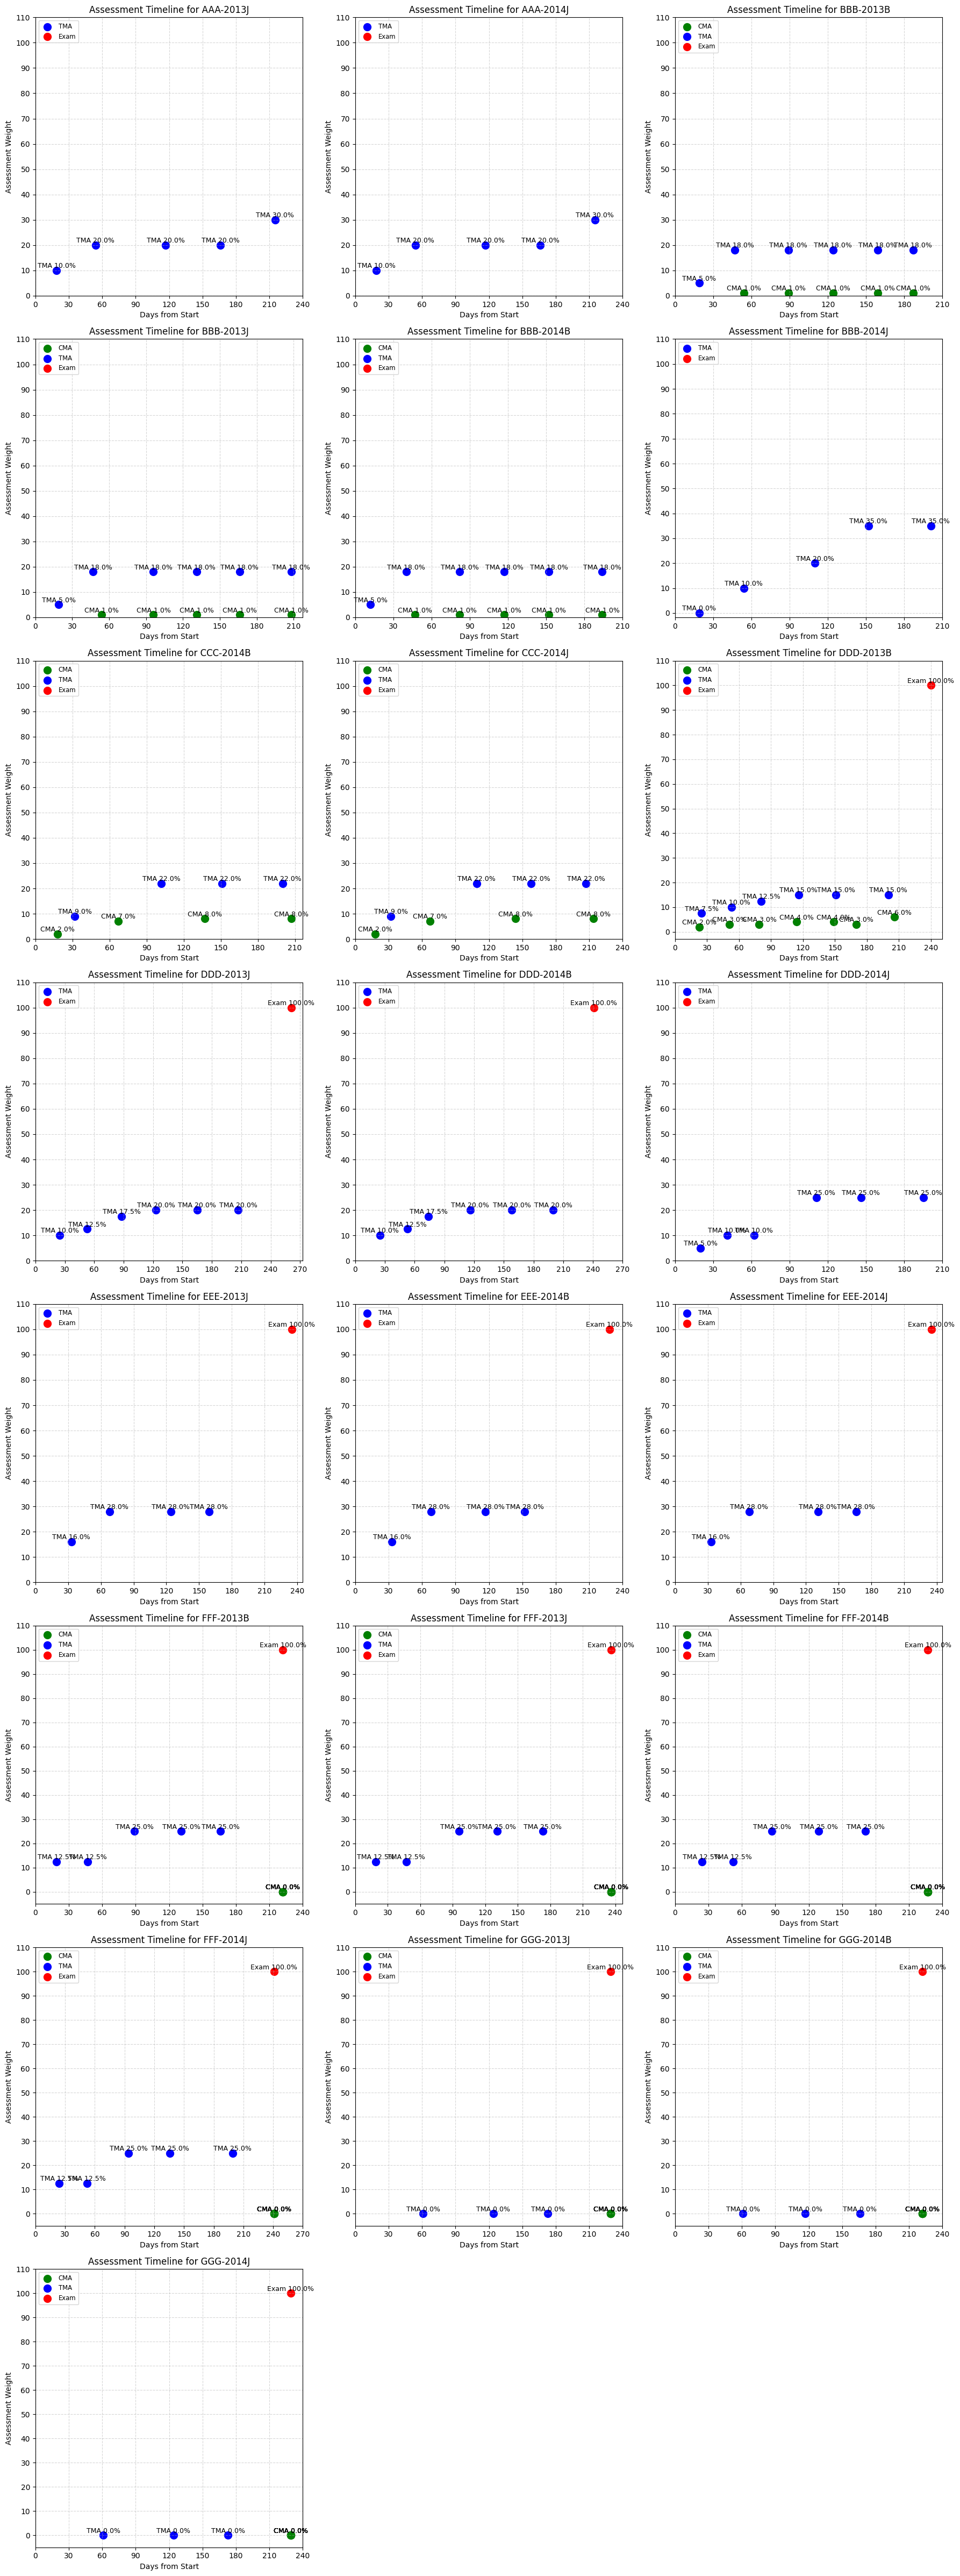

In [15]:
# Unique colors for each assessment type
assessment_colors = {
    'TMA': 'blue',
    'CMA': 'green',
    'Exam': 'red'
}

# Get all unique course-presentation combinations
combinations = assessments_df[['code_module', 'code_presentation']].drop_duplicates()

# Number of plots per row
plots_per_row = 3
num_combinations = len(combinations)
num_rows = (num_combinations // plots_per_row) + int(num_combinations % plots_per_row != 0)

# Create a large figure with multiple subplots
fig, axes = plt.subplots(num_rows, plots_per_row, figsize=(18, num_rows * 6))

# Flatten the axes for easy iteration (works for any number of rows)
axes = axes.flatten()

for i, (_, combo) in enumerate(combinations.iterrows()):
    module = combo['code_module']
    presentation = combo['code_presentation']

    # Filter data for the current combination
    combo_df = assessments_df[(assessments_df['code_module'] == module) & 
                              (assessments_df['code_presentation'] == presentation)]

    # Plot on the correct subplot
    ax = axes[i]

    for assessment_type in combo_df['assessment_type'].unique():
        # Filter by assessment type
        type_df = combo_df[combo_df['assessment_type'] == assessment_type]
        ax.scatter(type_df['date'], type_df['weight'], s=100, 
                   color=assessment_colors.get(assessment_type, 'black'), 
                   label=assessment_type)

    # Add annotations for each point
    for index, row in combo_df.iterrows():
        ax.text(row['date'], row['weight'] + 1, f"{row['assessment_type']} {row['weight']}%", 
                ha='center', fontsize=9)

    # Plot formatting
    ax.set_title(f'Assessment Timeline for {module}-{presentation}')
    ax.set_xlabel('Days from Start')
    ax.set_ylabel('Assessment Weight')
    ax.grid(True, linestyle='--', alpha=0.5)
    ax.set_xticks(range(0, int(combo_df['date'].max()) + 30, 30))
    ax.set_yticks(range(0, int(combo_df['weight'].max()) + 20, 10))

    # Set legend only once per subplot
    ax.legend(loc='upper left', fontsize='small')

# Hide any empty subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


These graphs nicely show the courses with their assessments over time. I note that overall the courses have a very clear and consistent overall schedule that they keep over the presentations. this means the assesments over the presentations are representable for the courses and they can be used as a stable indication. 

#### Missing values and duplicates

In [16]:
# Check for missing values
print("\nMissing Values:")
print(assessments_df.isnull().sum())


Missing Values:
code_module           0
code_presentation     0
id_assessment         0
assessment_type       0
date                 11
weight                0
dtype: int64


In [17]:
# Filter the DataFrame to display only rows with null values in any column
missing_df = assessments_df[assessments_df.isnull().any(axis=1)]

# Print the DataFrame with missing values
print(missing_df)


    code_module code_presentation  id_assessment assessment_type  date  weight
5           AAA             2013J           1757            Exam   NaN   100.0
11          AAA             2014J           1763            Exam   NaN   100.0
23          BBB             2013B          14990            Exam   NaN   100.0
35          BBB             2013J          15002            Exam   NaN   100.0
47          BBB             2014B          15014            Exam   NaN   100.0
53          BBB             2014J          15025            Exam   NaN   100.0
62          CCC             2014B          24290            Exam   NaN   100.0
63          CCC             2014B          40087            Exam   NaN   100.0
72          CCC             2014J          24299            Exam   NaN   100.0
73          CCC             2014J          40088            Exam   NaN   100.0
108         DDD             2014J          25368            Exam   NaN   100.0


By checking the rows with null values I can confirm that only exam dates are missing, like already metioned by the OULAD description. They also mention that these exams have been taken at the end of the last presentation week, this is why I will impute the module presentation lenght as the date for the exam. 

In [18]:
# Merge assessments_df with courses_df to bring in the module_presentation_length
merged_df = pd.merge(assessments_df, courses_df[['code_module', 'code_presentation', 'module_presentation_length']], 
                     on=['code_module', 'code_presentation'], how='left')

# Fill the missing 'date' values using the corresponding module_presentation_length
merged_df['date'] = merged_df['date'].fillna(merged_df['module_presentation_length'])

# Drop the extra column after filling the missing values
assessments_df = merged_df.drop(columns=['module_presentation_length'])

# Check if any missing values remain
print("\nAfter Imputation:")
print(assessments_df.isnull().sum())



After Imputation:
code_module          0
code_presentation    0
id_assessment        0
assessment_type      0
date                 0
weight               0
dtype: int64


In [19]:
# Check for any duplicate rows
duplicates =assessments_df.duplicated()

if duplicates.any():
    print(f"Number of duplicate rows: {duplicates.sum()}")
    print("\nDuplicate rows:")
    print(assessments_df[duplicates])
else:
    print("No duplicate rows found.")


No duplicate rows found.


## Analysis of student registrations dataframe

#### Data loading

In [20]:
# studentRegistration_df = pd.read_csv("../data/studentRegistration.csv")

#### Basic information

In [21]:
# Basic information and overview
print("Basic Information:")
print(studentRegistration_df.info())
print(studentRegistration_df.head())

Basic Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32593 entries, 0 to 32592
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   code_module          32593 non-null  object 
 1   code_presentation    32593 non-null  object 
 2   id_student           32593 non-null  int64  
 3   date_registration    32548 non-null  float64
 4   date_unregistration  10072 non-null  float64
dtypes: float64(2), int64(1), object(2)
memory usage: 1.2+ MB
None
  code_module code_presentation  id_student  date_registration  \
0         AAA             2013J       11391             -159.0   
1         AAA             2013J       28400              -53.0   
2         AAA             2013J       30268              -92.0   
3         AAA             2013J       31604              -52.0   
4         AAA             2013J       32885             -176.0   

   date_unregistration  
0                  NaN  
1        

#### Understanding of the columns [1]

This file contains information about the time when the student registered for the module presentation. For students who unregistered the unregistered date is also recorded. File contains five columns:
- code_module: an identification code for a module.
- code_presentation: the identification code of the presentation.
- id_student: a unique identification number for the student.
- date_registration: the date of student's registration on the module presentation, this is the number of days measured relative to the start of the module-presentation (e.g. the negative value -30 means that the student registered to module presentation 30 days before it started).
- date_unregistration: the student's unregistered date from the module presentation, this is the number of days measured relative to the start of the module-presentation. Students, who completed the course have this field empty. Students who unregistered have Withdrawal as the value of the final_result column in the studentInfo.csv file.

#### Distributions

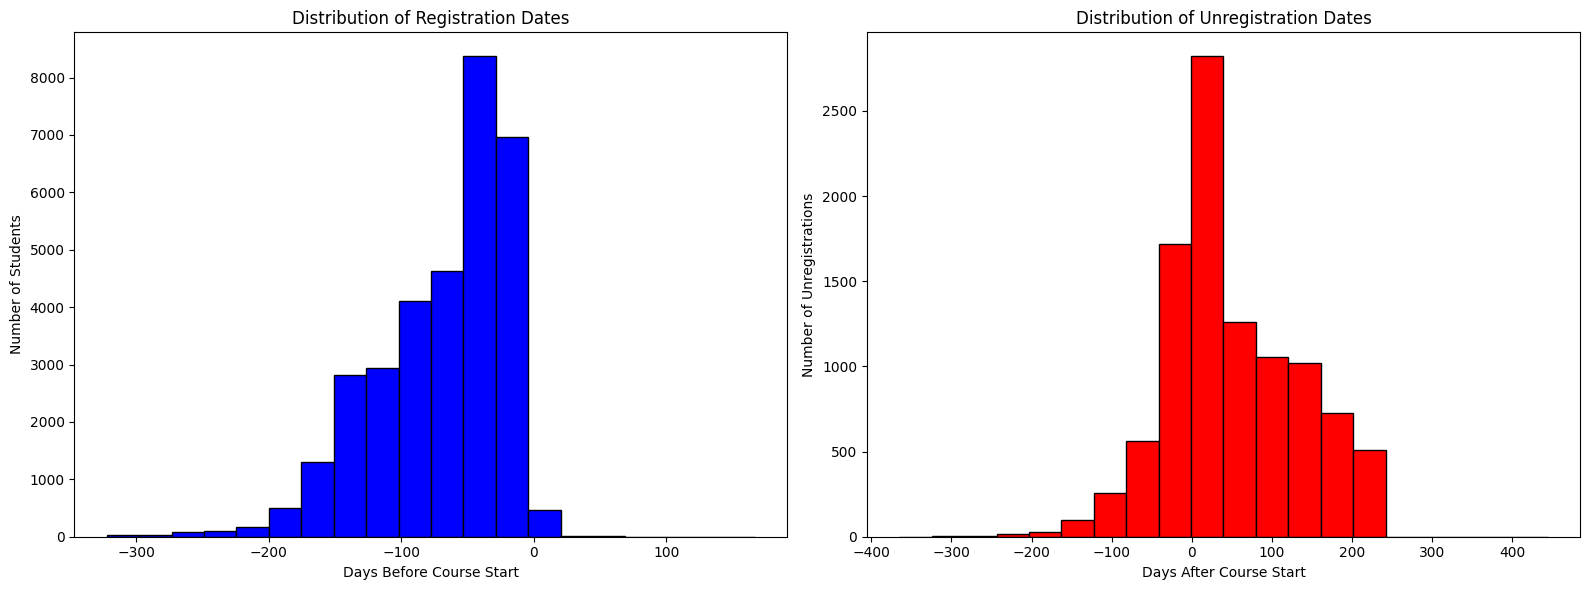

In [22]:
# Create a single figure with two subplots next to each other
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Plot 1: Registration date distribution
axes[0].hist(studentRegistration_df['date_registration'], bins=20, color='blue', edgecolor='black')
axes[0].set_title('Distribution of Registration Dates')
axes[0].set_xlabel('Days Before Course Start')
axes[0].set_ylabel('Number of Students')

# Plot 2: Unregistration date distribution
studentRegistration_df['date_unregistration'].dropna().plot(kind='hist', bins=20, color='red', edgecolor='black', ax=axes[1])
axes[1].set_title('Distribution of Unregistration Dates')
axes[1].set_xlabel('Days After Course Start')
axes[1].set_ylabel('Number of Unregistrations')

# Adjust layout
plt.tight_layout()
plt.show()

In [23]:
# Registration statistics
reg_stats = {
    'Min Registration Date': studentRegistration_df['date_registration'].min(),
    'Max Registration Date': studentRegistration_df['date_registration'].max(),
    'Average Registration Date': studentRegistration_df['date_registration'].mean(),
    'Number of Registrations': len(studentRegistration_df),
}

# Unregistration statistics (ignoring NaNs)
unreg_stats = {
    'Min Unregistration Date': studentRegistration_df['date_unregistration'].min(),
    'Max Unregistration Date': studentRegistration_df['date_unregistration'].max(),
    'Average Unregistration Date': studentRegistration_df['date_unregistration'].mean(),
    'Number of Unregistrations': studentRegistration_df['date_unregistration'].notnull().sum(),
    'Percentage Unregistered': (studentRegistration_df['date_unregistration'].notnull().sum() / len(studentRegistration_df)) * 100
}

# Print statistics
print("Registration Statistics:")
for stat, value in reg_stats.items():
    print(f"  {stat}: {value:.2f}")

print("\nUnregistration Statistics:")
for stat, value in unreg_stats.items():
    print(f"  {stat}: {value:.2f}")


Registration Statistics:
  Min Registration Date: -322.00
  Max Registration Date: 167.00
  Average Registration Date: -69.41
  Number of Registrations: 32593.00

Unregistration Statistics:
  Min Unregistration Date: -365.00
  Max Unregistration Date: 444.00
  Average Unregistration Date: 49.76
  Number of Unregistrations: 10072.00
  Percentage Unregistered: 30.90


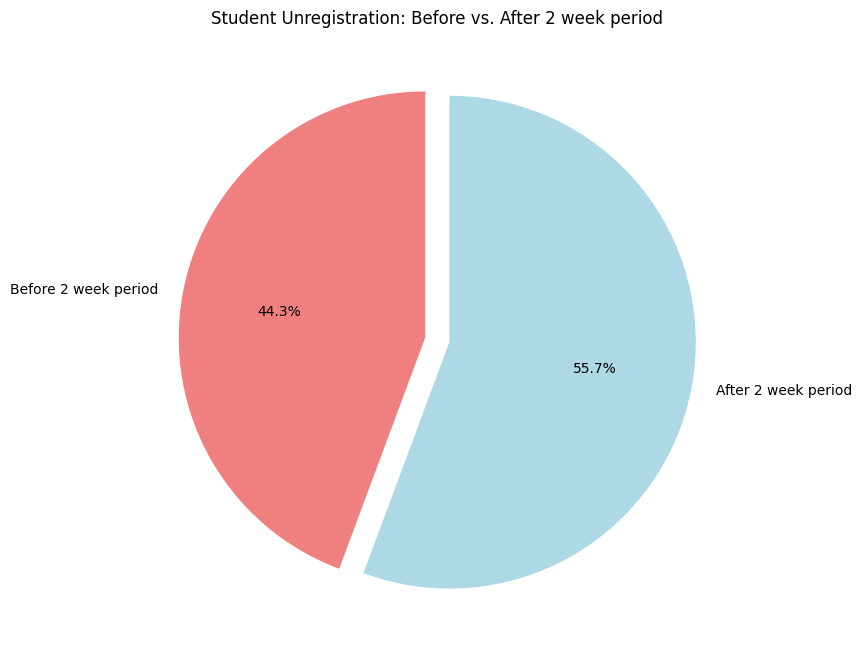

In [24]:
# Filter unregistered students (drop NaN in date_unregistration)
unregistered_df = studentRegistration_df.dropna(subset=['date_unregistration'])

# Categorize unregistration
before_start = unregistered_df[unregistered_df['date_unregistration'] < 14].shape[0]
after_start = unregistered_df[unregistered_df['date_unregistration'] >= 14].shape[0]

# Prepare data for the pie chart
labels = ['Before 2 week period', 'After 2 week period']
sizes = [before_start, after_start]
colors = ['lightcoral', 'lightblue']

# Plotting the pie chart
plt.figure(figsize=(8, 8))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', colors=colors, startangle=90, explode=(0.05, 0.05))
plt.title('Student Unregistration: Before vs. After 2 week period')
plt.show()


Because I am only interested in predicting what students are at-risk, either for failing or withdrawing them selfes, I will remove all students who have an unregistration date before the 3rd week of the course. Ususally students can determine wether they want to take a course or want to switch in the first 2 weeks of the course. This means everyone who withdrawn themselves after the 14th day of the course thought they were going to finish it. 

In [25]:
# Step 1: Identify students who unregistered before the 2-week period
early_unregistered_ids = studentRegistration_df[
    studentRegistration_df["date_unregistration"] < 14
]["id_student"].unique()

# Step 2: Remove them from ALL relevant DataFrames
studentRegistration_df = studentRegistration_df[~studentRegistration_df["id_student"].isin(early_unregistered_ids)]
studentInfo_df = studentInfo_df[~studentInfo_df["id_student"].isin(early_unregistered_ids)]
studentAssessment_df = studentAssessment_df[~studentAssessment_df["id_student"].isin(early_unregistered_ids)]
studentVle_df = studentVle_df[~studentVle_df["id_student"].isin(early_unregistered_ids)]

# Step 3: Optional — check how many were removed
print(f"Removed {len(early_unregistered_ids)} students who unregistered before day 14.")


Removed 4162 students who unregistered before day 14.


Eventhough unregistration data can be very usefull in other tasks, including it in my final dataset will be cheating since all students with an unregistration date automatically fall into the at-risk label. That is why I am choosing to drop the column. <!-- In my thesis I want to  be able to make valuable predictions on wether a student is going to pass or is at-risk. This means I do want to include students who have withdrawn because maybe they could have been warned that they were going in the wrong direction, however this will not be usefull for students who have unregistered before the course even started. Which is why I am going to drop those students from the dataset. The advantage this has is that the model won't have to deal with students who have no assessments registered and it will be able to focus on usefull predictions. -->

In [26]:
# Drop the 'date_unregistration' column
studentRegistration_df.drop(columns=['date_unregistration'], inplace=True)

# Verify that the column is removed
print("Dataframe after dropping 'date_unregistration':")
print(studentRegistration_df.head())

Dataframe after dropping 'date_unregistration':
  code_module code_presentation  id_student  date_registration
0         AAA             2013J       11391             -159.0
1         AAA             2013J       28400              -53.0
3         AAA             2013J       31604              -52.0
4         AAA             2013J       32885             -176.0
5         AAA             2013J       38053             -110.0


#### Missing values and duplicates

In [27]:
# Check for missing values
print("Missing Values per Column:")
print(studentRegistration_df.isnull().sum())
print("\n")

Missing Values per Column:
code_module          0
code_presentation    0
id_student           0
date_registration    7
dtype: int64




In [28]:
# Fill missing values with 0
studentRegistration_df["date_registration"] = studentRegistration_df["date_registration"].fillna(0)
print("Missing Values per Column:")
print(studentRegistration_df.isnull().sum())
print("\n")

Missing Values per Column:
code_module          0
code_presentation    0
id_student           0
date_registration    0
dtype: int64




In [29]:
# Check for any duplicate rows
duplicates = studentRegistration_df.duplicated()

if duplicates.any():
    print(f"Number of duplicate rows: {duplicates.sum()}")
    print("\nDuplicate rows:")
    print(studentRegistration_df[duplicates])
else:
    print("No duplicate rows found.")


No duplicate rows found.


## Analysis of student info dataframe

#### Data loading

In [30]:
# studentInfo_df = pd.read_csv("../data/studentInfo.csv")

#### Basic information

In [31]:
# Basic information and overview
print("Basic Information:")
print(studentInfo_df.info())
print(studentInfo_df.head())

Basic Information:
<class 'pandas.core.frame.DataFrame'>
Index: 27379 entries, 0 to 32592
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   code_module           27379 non-null  object
 1   code_presentation     27379 non-null  object
 2   id_student            27379 non-null  int64 
 3   gender                27379 non-null  object
 4   region                27379 non-null  object
 5   highest_education     27379 non-null  object
 6   imd_band              26351 non-null  object
 7   age_band              27379 non-null  object
 8   num_of_prev_attempts  27379 non-null  int64 
 9   studied_credits       27379 non-null  int64 
 10  disability            27379 non-null  object
 11  final_result          27379 non-null  object
dtypes: int64(3), object(9)
memory usage: 2.7+ MB
None
  code_module code_presentation  id_student gender                region  \
0         AAA             2013J       11391   

#### Understanding of columns [1]

This file contains demographic information about the students together with their results. File contains the following columns:
- code_module: an identification code for a module on which the student is registered.
- code_presentation: the identification code of the presentation during which the student is registered on the module.
- id_student: a unique identification number for the student.
- gender: the student's gender.
- region:  identifies the geographic region, where the student lived while taking the module-presentation.
- highest_education: highest student education level on entry to the module presentation.
- imd_band: specifies the Index of Multiple Depravation band of the place where the student lived during the module-presentation.
- age_band: band of the student's age.
- num_of_prev_attempts: the number times the student has attempted this module.
- studied_credits: the total number of credits for the modules the student is currently studying.
- disability: indicates whether the student has declared a disability.
- final_result: student's final result in the module-presentation.

#### Distributions

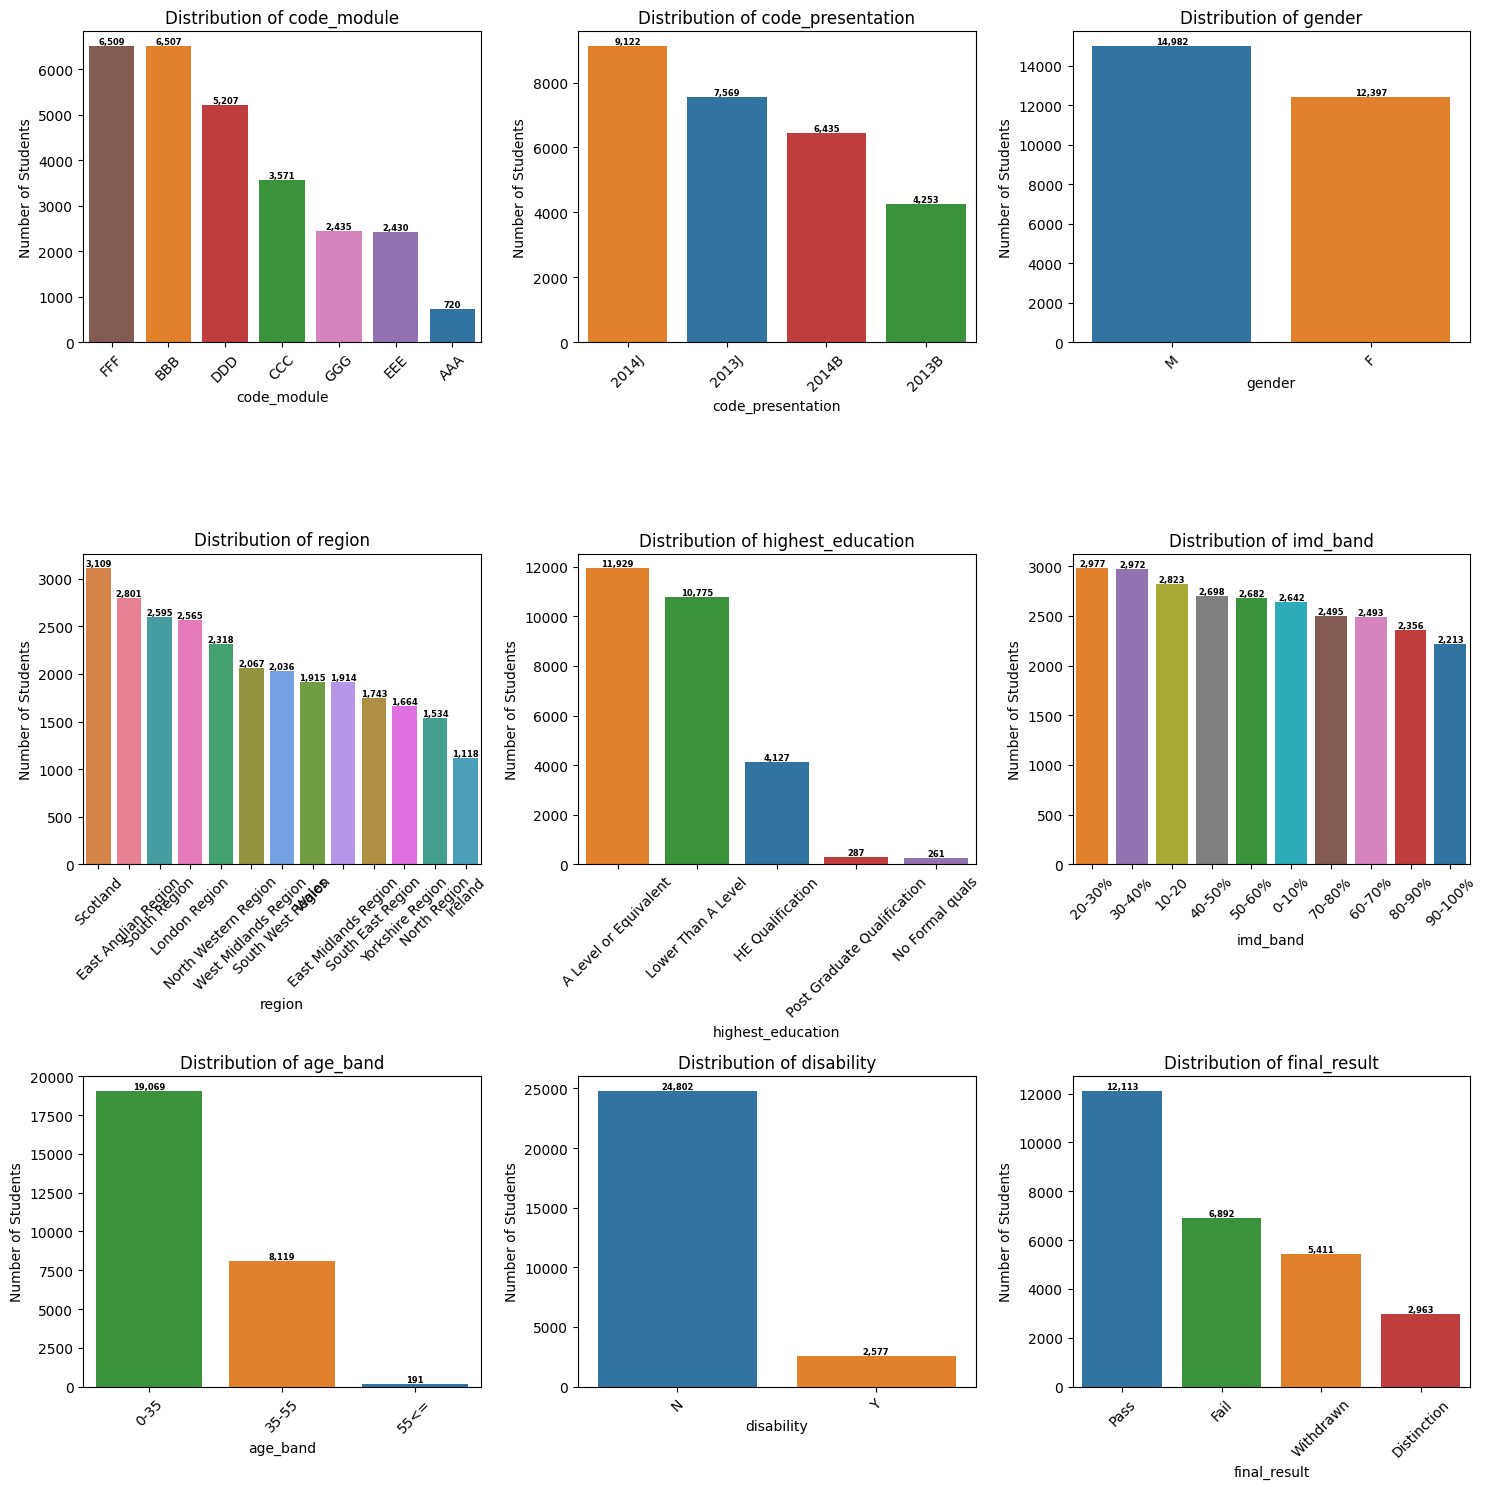

In [32]:
# Define categorical columns
categorical_columns = ["code_module", "code_presentation", "gender", "region", "highest_education", 
                       "imd_band", "age_band", "disability", "final_result"]

cols = 3  
rows = -(-len(categorical_columns) // cols)  # Ceiling division to determine number of rows

fig, axes = plt.subplots(rows, cols, figsize=(15, 5 * rows))  # Adjust figure size dynamically
axes = axes.flatten()  # Flatten the axes array for easy indexing

# Generate bar plots for each categorical column
for i, column in enumerate(categorical_columns):
    sns.countplot(data=studentInfo_df, x=column, order=studentInfo_df[column].value_counts().index, 
                  ax=axes[i], hue=column, legend=False)
    
    axes[i].set_title(f"Distribution of {column}")
    axes[i].set_xlabel(column)
    axes[i].set_ylabel("Number of Students")
    axes[i].tick_params(axis='x', rotation=45)

    # Add annotations to bars
    for p in axes[i].patches:
        axes[i].annotate(f"{p.get_height():,.0f}", 
                         (p.get_x() + p.get_width() / 2, p.get_height()), 
                         ha='center', va='bottom', fontsize=6, fontweight='bold', color='black')

# Remove empty subplots if any
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


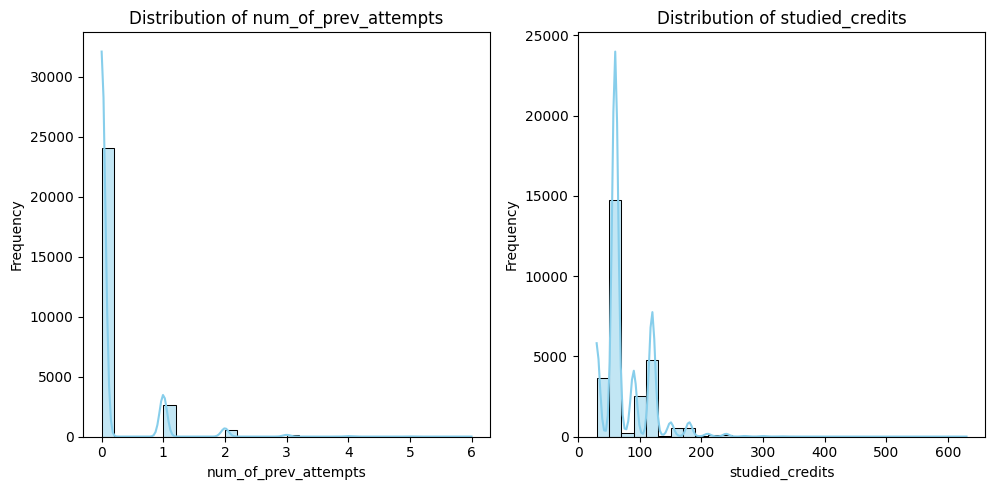

In [33]:
# Define numerical columns
numerical_columns = ["num_of_prev_attempts", "studied_credits"]

cols = 3
rows = -(-len(numerical_columns) // cols)  # Ceiling division to determine number of rows

fig, axes = plt.subplots(rows, cols, figsize=(15, 5 * rows))  # Adjust figure size dynamically
axes = axes.flatten()  # Flatten the axes array for easy indexing

# Generate histogram plots for each numerical column
for i, column in enumerate(numerical_columns):
    sns.histplot(data=studentInfo_df, x=column, kde=True, ax=axes[i], bins=30, color='skyblue')
    
    axes[i].set_title(f"Distribution of {column}")
    axes[i].set_xlabel(column)
    axes[i].set_ylabel("Frequency")
    
    # Add annotations for density peaks (if KDE is plotted)
    if hasattr(axes[i], 'lines') and axes[i].lines:
        max_peak = max(axes[i].lines[0].get_ydata())
        peak_idx = axes[i].lines[0].get_ydata().argmax()
        peak_value = axes[i].lines[0].get_xdata()[peak_idx]

# Remove empty subplots if any
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


The final result probabilities will be merged into Pass, which include students that pass and students that get a distinction and at-risk, which includes students that withdraw or faill. 

In [34]:
# Merge categories in the final_result column
studentInfo_df['final_result'] = studentInfo_df['final_result'].replace({
    'Distinction': 'Pass',
    'Pass': 'Pass',
    'Fail': 'At-Risk',
    'Withdrawn': 'At-Risk'
})

# Verify the changes
print(studentInfo_df['final_result'].value_counts())


final_result
Pass       15076
At-Risk    12303
Name: count, dtype: int64


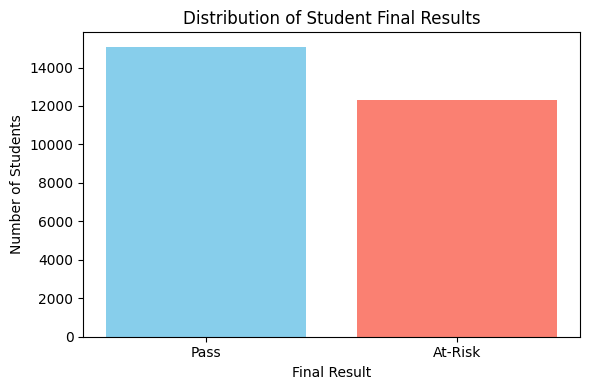

In [35]:
import matplotlib.pyplot as plt

# Count the occurrences of each category
final_counts = studentInfo_df['final_result'].value_counts()

# Assign colors to each category
colors = ['skyblue', 'salmon']  # Adjust as desired

# Plotting
plt.figure(figsize=(6, 4))
plt.bar(final_counts.index, final_counts.values, color=colors)
plt.title('Distribution of Student Final Results')
plt.xlabel('Final Result')
plt.ylabel('Number of Students')
plt.tight_layout()
plt.show()


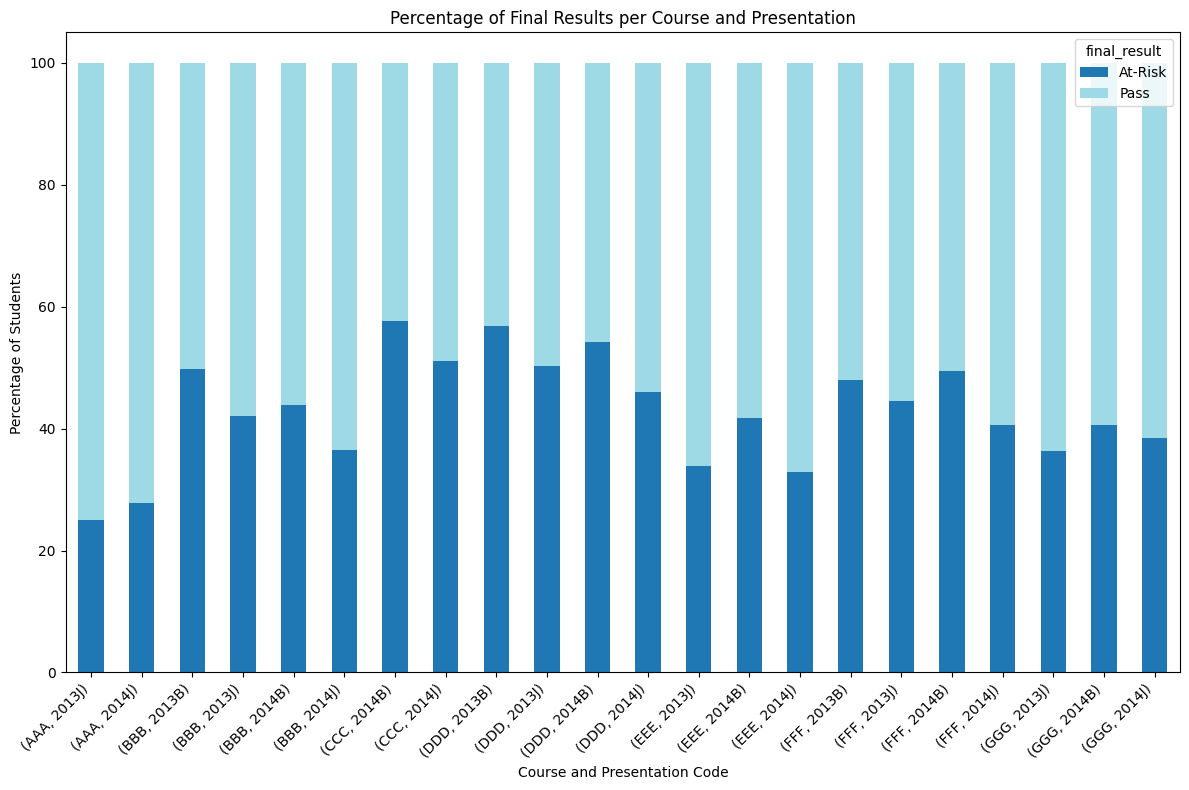

In [36]:
# Group by module, presentation, and final result, and count occurrences
result_counts = studentInfo_df.groupby(['code_module', 'code_presentation', 'final_result']).size().reset_index(name='count')

# Calculate the total number of students per course-presentation combination
total_counts = result_counts.groupby(['code_module', 'code_presentation'])['count'].transform('sum')

# Calculate the percentage of each category
result_counts['percentage'] = (result_counts['count'] / total_counts) * 100

# Pivot the data to get final results as columns with percentage values
pivot_df = result_counts.pivot_table(index=['code_module', 'code_presentation'], columns='final_result', values='percentage', fill_value=0)

# Plotting the stacked bar chart
pivot_df.plot(kind='bar', stacked=True, figsize=(12, 8), colormap='tab20')
plt.title('Percentage of Final Results per Course and Presentation')
plt.xlabel('Course and Presentation Code')
plt.ylabel('Percentage of Students')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

From this we can see there might be courses in which the chance that you pass is higher than that you are at-risk. This might indicate that those courses are more difficult, or for example students in those courses are less motivated. This could reflect on the proffessors ability to teacht, but also the attendence of the course. 

In [37]:
# Group by course module and calculate the average percentage for each final result
average_percentages = result_counts.groupby(['code_module', 'final_result'])['percentage'].mean().unstack()

# Print the average percentages
print("Average Percentage of Passing and At-Risk Students per Course:")
print(average_percentages)


Average Percentage of Passing and At-Risk Students per Course:
final_result    At-Risk       Pass
code_module                       
AAA           26.430541  73.569459
BBB           43.044467  56.955533
CCC           54.431845  45.568155
DDD           51.851237  48.148763
EEE           36.176337  63.823663
FFF           45.598782  54.401218
GGG           38.423754  61.576246


#### Missing values and duplicates

In [38]:
# Check for missing values
print("\nMissing Values:")
print(studentInfo_df.isnull().sum())


Missing Values:
code_module                0
code_presentation          0
id_student                 0
gender                     0
region                     0
highest_education          0
imd_band                1028
age_band                   0
num_of_prev_attempts       0
studied_credits            0
disability                 0
final_result               0
dtype: int64


Imd_band stands for Index of Multiple Depravation and is a measure for relative deprivation//poverty of small areas. We can most likely impute them by seeing if there is a correlation between imd_band and region. If there is nog significant relation I will create a new category called "unknown" and categories the missinf values as such. Mostly because the feature is sensitive feature and I wouldn't want to discriminate/introduce bias because of imputing something I'm not sure about. 

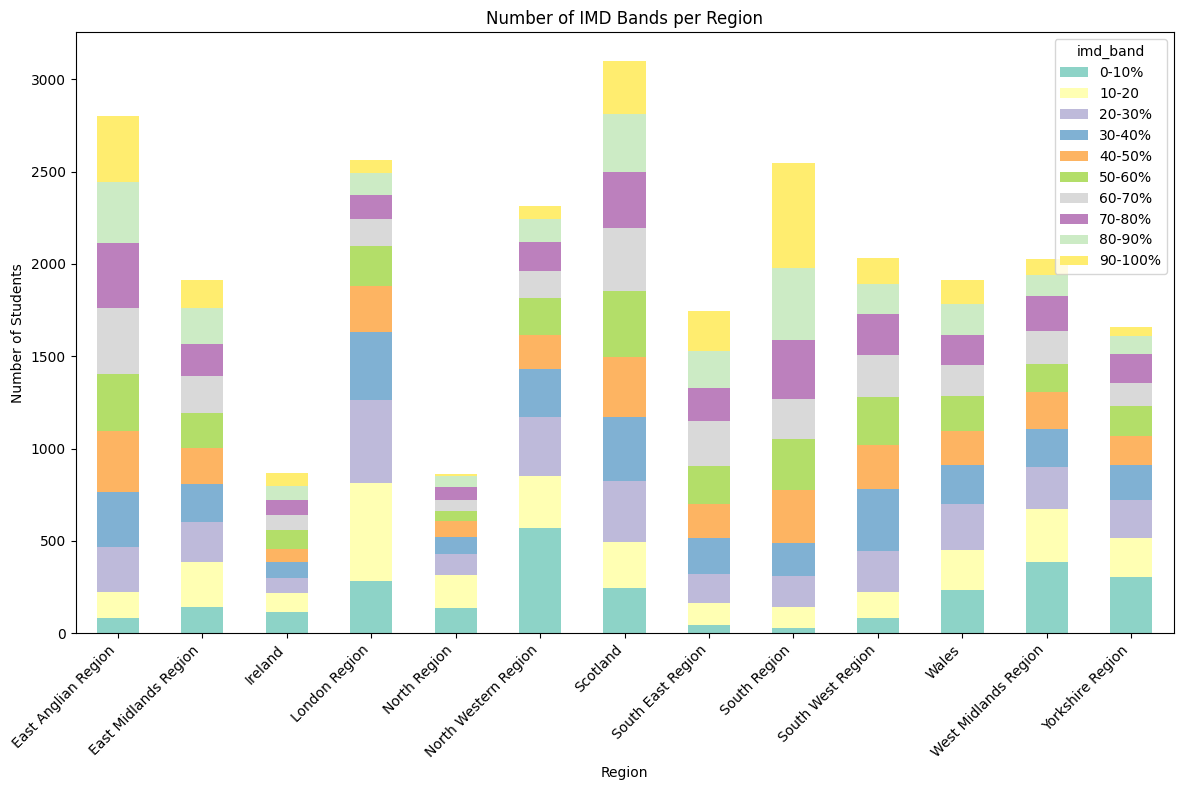

In [39]:
# Group by region and IMD band, and count occurrences
imd_counts = studentInfo_df.groupby(['region', 'imd_band']).size().reset_index(name='count')

# Pivot the data to have IMD bands as columns
imd_pivot = imd_counts.pivot_table(index='region', columns='imd_band', values='count', fill_value=0)

# Plotting the stacked bar chart
imd_pivot.plot(kind='bar', stacked=True, figsize=(12, 8), colormap='Set3')
plt.title('Number of IMD Bands per Region')
plt.xlabel('Region')
plt.ylabel('Number of Students')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

I can quickly see there is nog significant imd_band per region, so I will impute a new category.

In [40]:
# Impute missing values in the 'imd_band' column with the category 'Unknown'
# Use direct assignment to avoid chained assignment warning
studentInfo_df['imd_band'] = studentInfo_df['imd_band'].fillna('Unknown')

# Verify if there are still missing values
print("Missing values in 'imd_band' after imputation:")
print(studentInfo_df['imd_band'].isnull().sum())

Missing values in 'imd_band' after imputation:
0


In [41]:
# Check for any duplicate rows
duplicates = studentInfo_df.duplicated()

if duplicates.any():
    print(f"Number of duplicate rows: {duplicates.sum()}")
    print("\nDuplicate rows:")
    print(studentInfo_df[duplicates])
else:
    print("No duplicate rows found.")


No duplicate rows found.


## Analysis of student assessments dataframe

#### Data loading

In [42]:
# studentAssessment_df = pd.read_csv("../data/studentAssessment.csv")

#### Basic information

In [43]:
# Basic information and overview
print("Basic Information:")
print(studentAssessment_df.info())
print(studentAssessment_df.head())

Basic Information:
<class 'pandas.core.frame.DataFrame'>
Index: 169762 entries, 0 to 173911
Data columns (total 5 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   id_assessment   169762 non-null  int64  
 1   id_student      169762 non-null  int64  
 2   date_submitted  169762 non-null  int64  
 3   is_banked       169762 non-null  int64  
 4   score           169610 non-null  float64
dtypes: float64(1), int64(4)
memory usage: 7.8 MB
None
   id_assessment  id_student  date_submitted  is_banked  score
0           1752       11391              18          0   78.0
1           1752       28400              22          0   70.0
2           1752       31604              17          0   72.0
3           1752       32885              26          0   69.0
4           1752       38053              19          0   79.0


#### Understanding of columns [1]

This file contains the results of students' assessments. If the student does not submit the assessment, no result is recorded. The final exam submissions is missing, if the result of the assessments is not stored in the system.
This file contains the following columns:
- id_assessment: the identification number of the assessment.
- id_student: a unique identification number for the student.
- date_submitted: the date of student submission, measured as the number of days since the start of the module presentation.
- is_banked: a status flag indicating that the assessment result has been transferred from a previous presentation.
- score: the student's score in this assessment. The range is from 0 to 100. The score lower than 40 is interpreted as Fail. 

#### Distributions

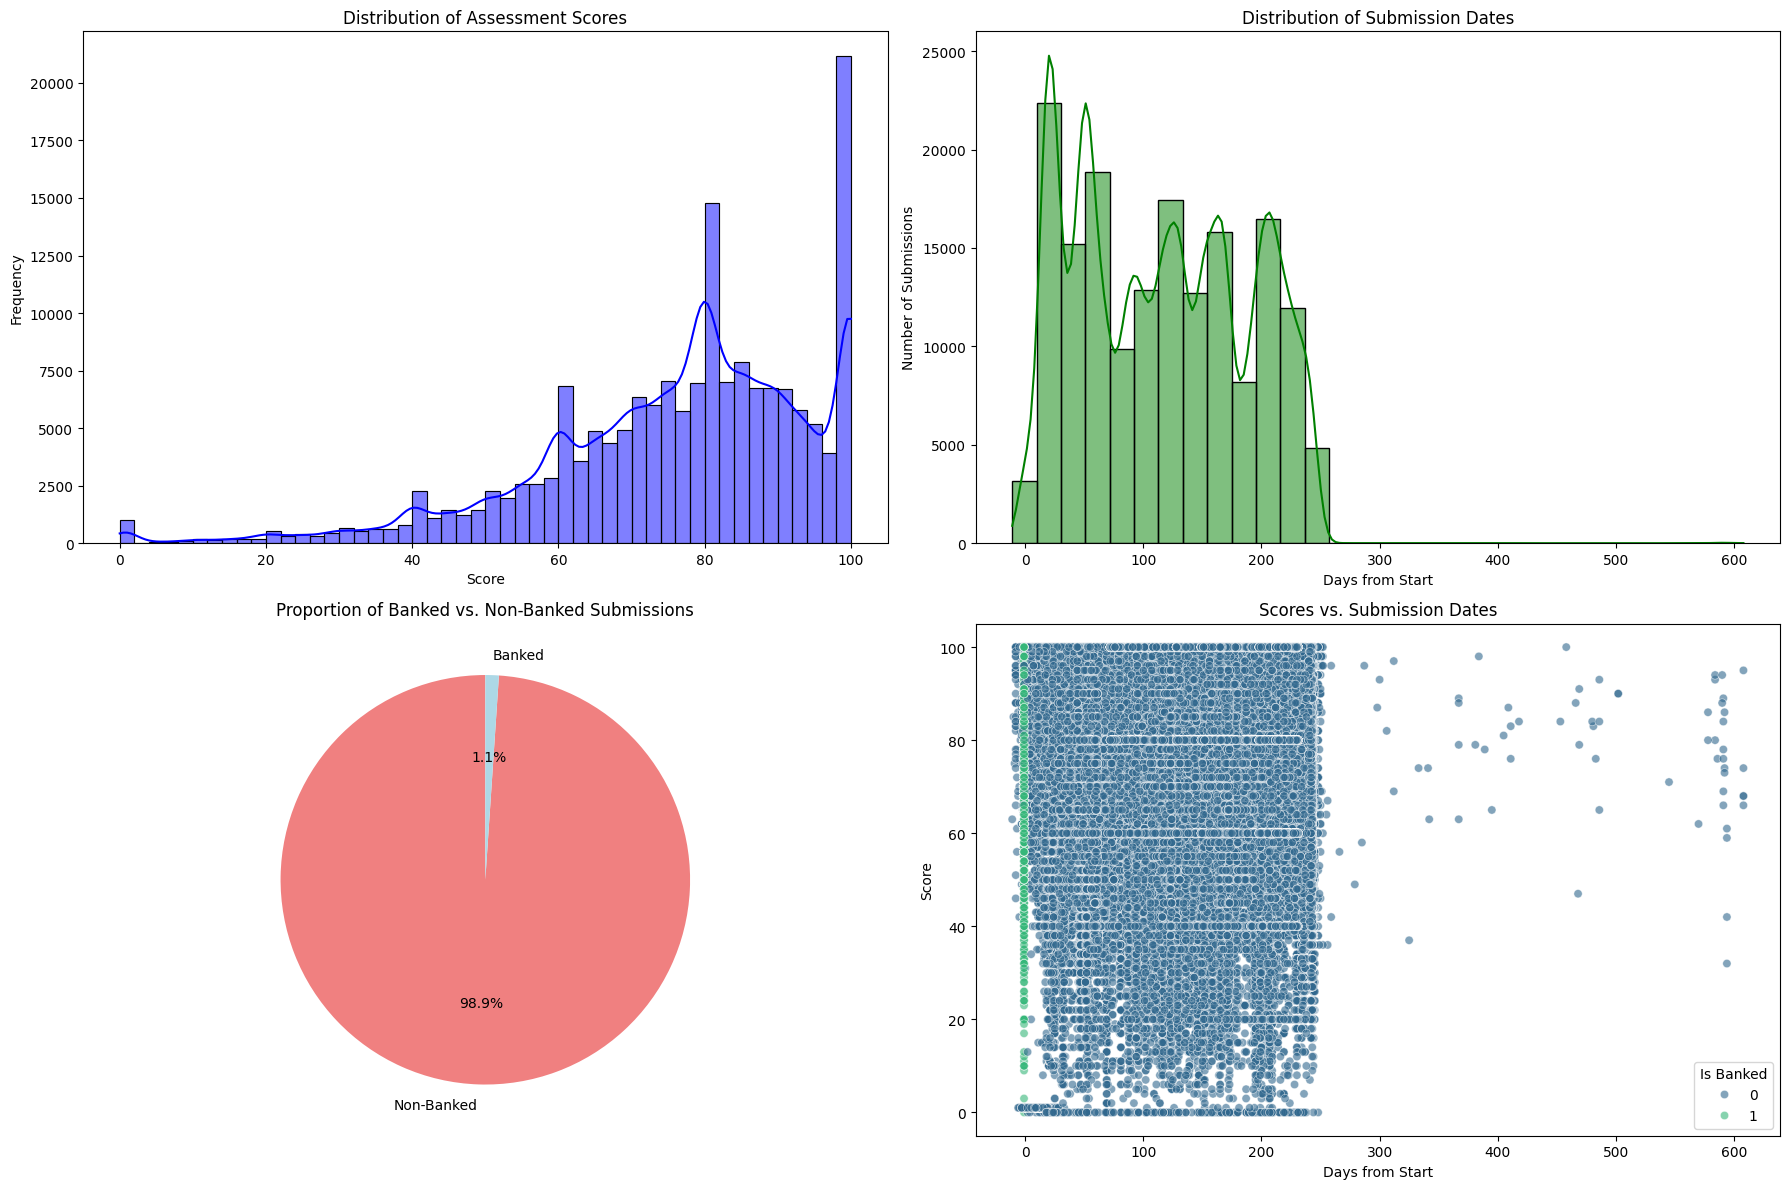

In [44]:
# Create a 2x2 subplot grid
fig, axes = plt.subplots(2, 2, figsize=(18, 12))

# Visualization 1: Score Distribution (Histogram + KDE)
sns.histplot(data=studentAssessment_df, x='score', bins=50, kde=True, color='blue', ax=axes[0, 0])
axes[0, 0].set_title('Distribution of Assessment Scores')
axes[0, 0].set_xlabel('Score')
axes[0, 0].set_ylabel('Frequency')

# Visualization 2: Submission Date Distribution
sns.histplot(data=studentAssessment_df, x='date_submitted', bins=30, kde=True, color='green', ax=axes[0, 1])
axes[0, 1].set_title('Distribution of Submission Dates')
axes[0, 1].set_xlabel('Days from Start')
axes[0, 1].set_ylabel('Number of Submissions')

# Visualization 3: Banked vs. Non-Banked Submissions (Pie Chart)
banked_counts = studentAssessment_df['is_banked'].value_counts()
axes[1, 0].pie(banked_counts, labels=['Non-Banked', 'Banked'], autopct='%1.1f%%', colors=['lightcoral', 'lightblue'], startangle=90)
axes[1, 0].set_title('Proportion of Banked vs. Non-Banked Submissions')

# Visualization 4: Scores vs. Submission Dates (Scatter Plot)
sns.scatterplot(data=studentAssessment_df, x='date_submitted', y='score', hue='is_banked', palette='viridis', alpha=0.6, ax=axes[1, 1])
axes[1, 1].set_title('Scores vs. Submission Dates')
axes[1, 1].set_xlabel('Days from Start')
axes[1, 1].set_ylabel('Score')
axes[1, 1].legend(title='Is Banked')

# Adjust layout to make sure everything fits well
plt.tight_layout()
plt.show()


In the first graph I note that there are a lot of high grades, eventhough approximatly half of the students is at risk. Let's see the distributions of scores per assessment type.
It's also interesting to see that there are submissions after the end of the course as can be seen in the second and fourth graphs. 

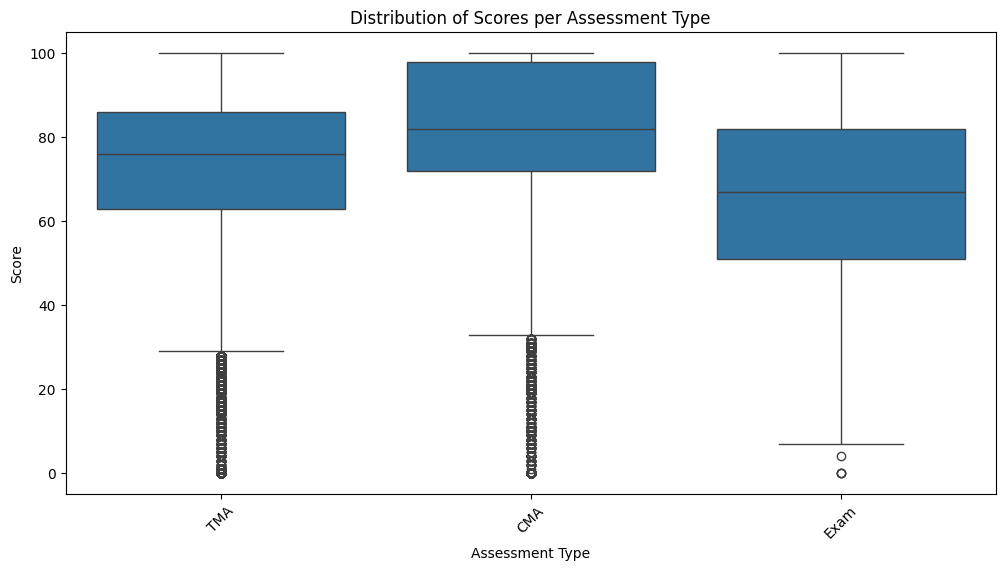

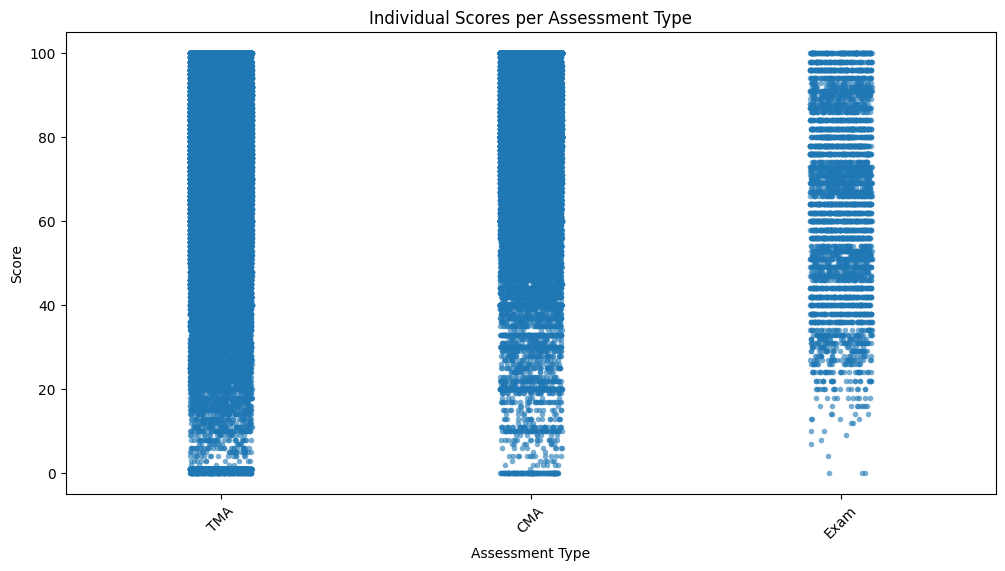

In [45]:
# Step 1: Merge studentAssessment_df with assessments_df to get assessment type
merged_scores_df = pd.merge(studentAssessment_df, assessments_df[['id_assessment', 'assessment_type']], on='id_assessment', how='left')

# Step 2: Box Plot to visualize the distribution of scores per assessment type
plt.figure(figsize=(12, 6))
sns.boxplot(data=merged_scores_df, x='assessment_type', y='score')
plt.title('Distribution of Scores per Assessment Type')
plt.xlabel('Assessment Type')
plt.ylabel('Score')
plt.xticks(rotation=45)
plt.show()

# Step 3: Strip Plot to show individual data points per assessment type
plt.figure(figsize=(12, 6))
sns.stripplot(data=merged_scores_df, x='assessment_type', y='score', jitter=True, size=4, alpha=0.6)
plt.title('Individual Scores per Assessment Type')
plt.xlabel('Assessment Type')
plt.ylabel('Score')
plt.xticks(rotation=45)
plt.show()


In [46]:
# Merge studentAssessment_df with assessments_df to get assessment type
merged_scores_df = pd.merge(studentAssessment_df, assessments_df[['id_assessment', 'assessment_type']], on='id_assessment', how='left')

# Group by assessment type and calculate descriptive statistics
score_stats = merged_scores_df.groupby('assessment_type')['score'].describe()

# Print the statistics
print("Summary Statistics for Scores per Assessment Type:")
print(score_stats)


Summary Statistics for Scores per Assessment Type:
                   count       mean        std  min   25%   50%   75%    max
assessment_type                                                             
CMA              69093.0  81.150478  17.782960  0.0  72.0  82.0  98.0  100.0
Exam              4831.0  65.594287  20.574476  0.0  51.0  67.0  82.0  100.0
TMA              95686.0  72.607477  18.361563  0.0  63.0  76.0  86.0  100.0


In [47]:
# Step 1: Merge studentAssessment_df with assessments_df to get course and presentation codes
merged_scores_course_df = pd.merge(studentAssessment_df, assessments_df[['id_assessment', 'code_module', 'code_presentation']], on='id_assessment', how='left')

# Step 2: Group by course and presentation, and calculate descriptive statistics
course_presentation_stats = merged_scores_course_df.groupby(['code_module', 'code_presentation'])['score'].describe()

# Print the basic statistics
print("Summary Statistics for Scores per Course-Presentation:")
print(course_presentation_stats)

Summary Statistics for Scores per Course-Presentation:
                                 count       mean        std   min   25%  \
code_module code_presentation                                              
AAA         2013J               1629.0  69.446286  12.639943   0.0  62.0   
            2014J               1508.0  68.588859  13.308825  11.0  61.0   
BBB         2013B              11182.0  79.109998  17.971414   0.0  68.0   
            2013J              14295.0  78.915425  17.199963   0.0  68.0   
            2014B               9815.0  78.986449  17.665919   0.0  68.0   
            2014J               7239.0  65.889349  26.615622   0.0  57.0   
CCC         2014B               7403.0  71.051060  23.243767   0.0  56.0   
            2014J              10977.0  75.044001  21.827323   0.0  62.0   
DDD         2013B              10119.0  69.810653  20.579894   0.0  57.0   
            2013J               7689.0  69.700871  19.847402   0.0  58.0   
            2014B               4

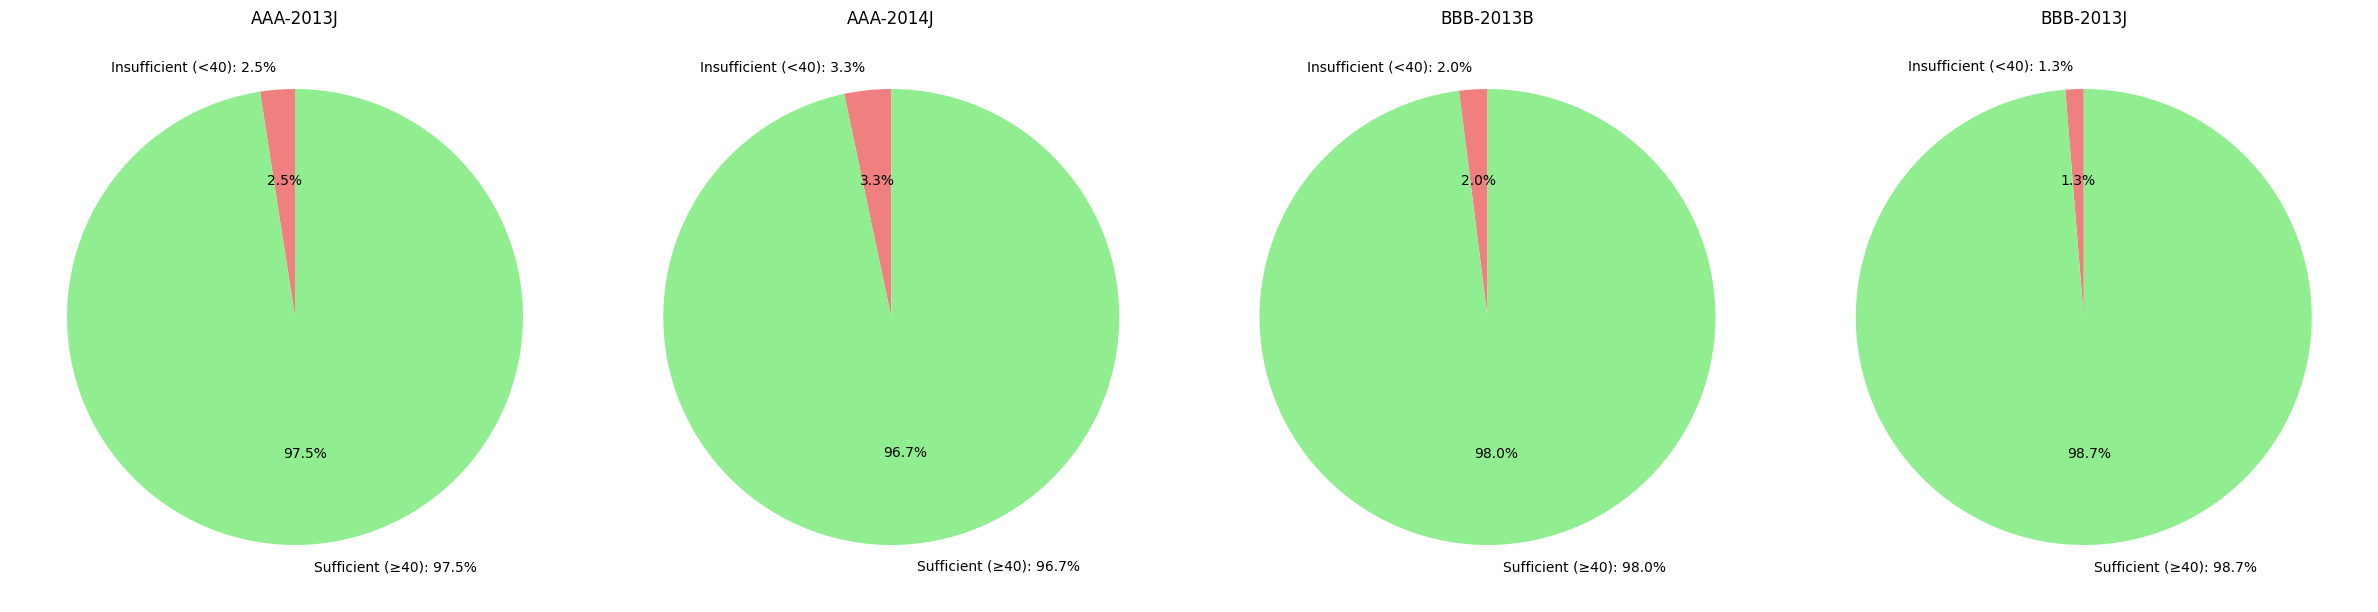

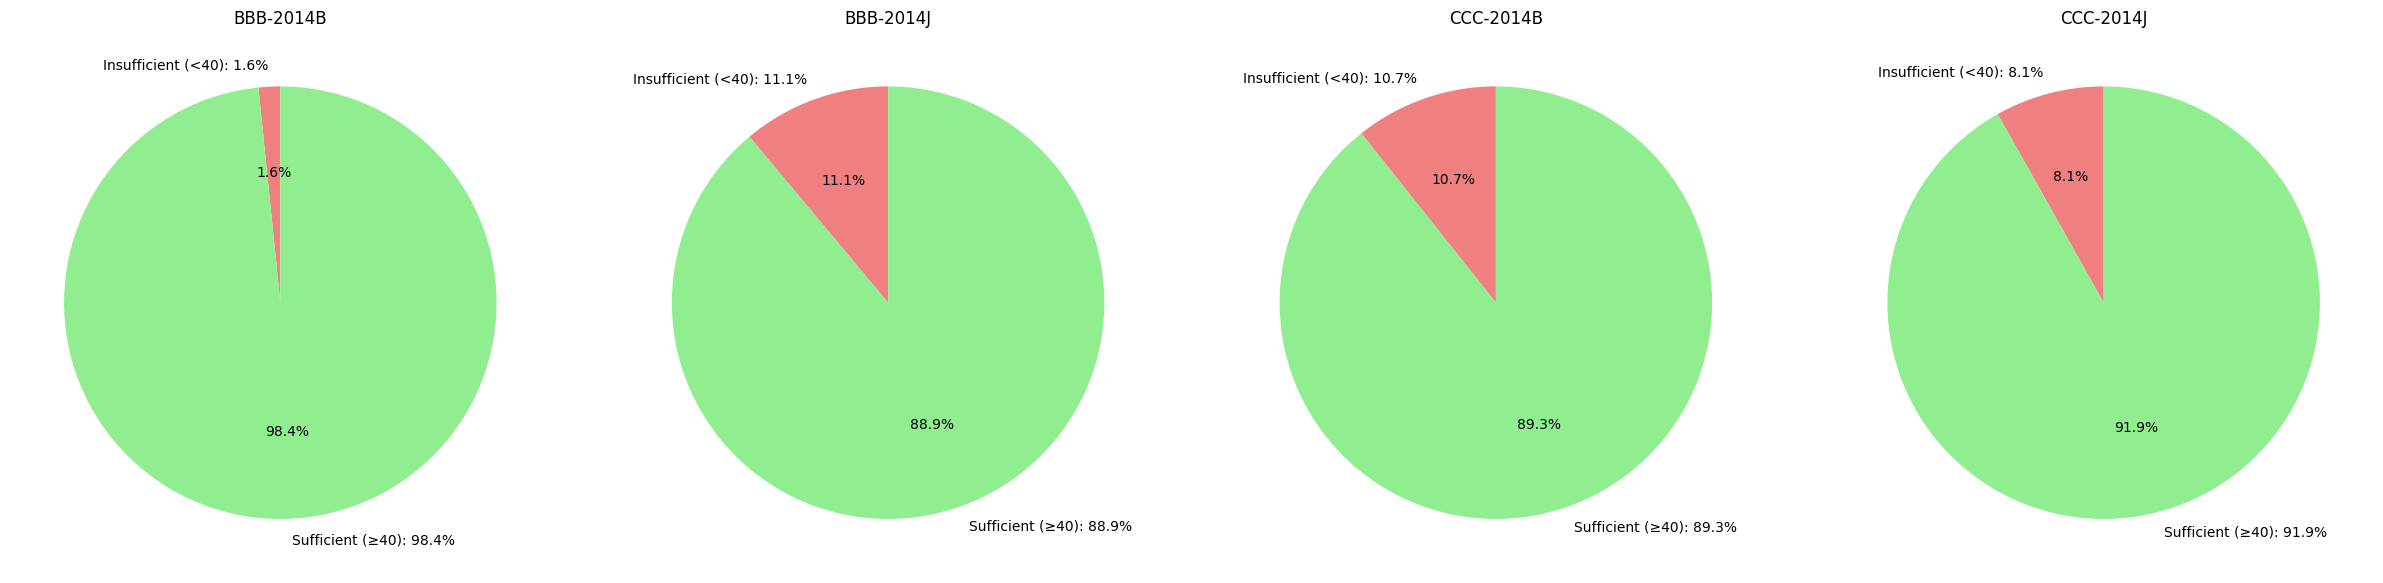

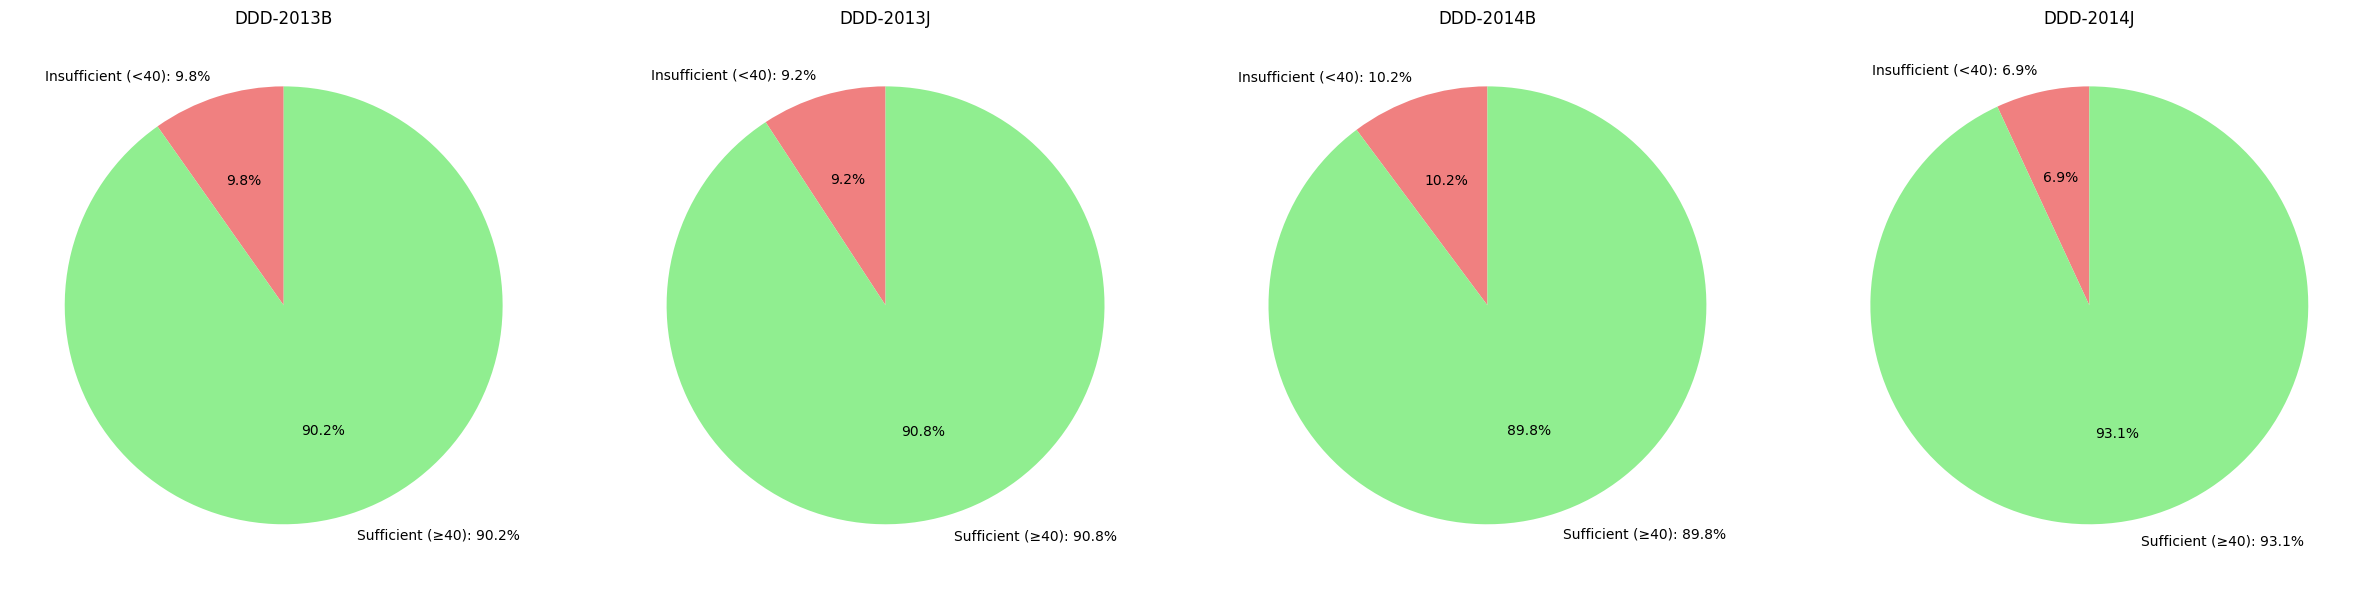

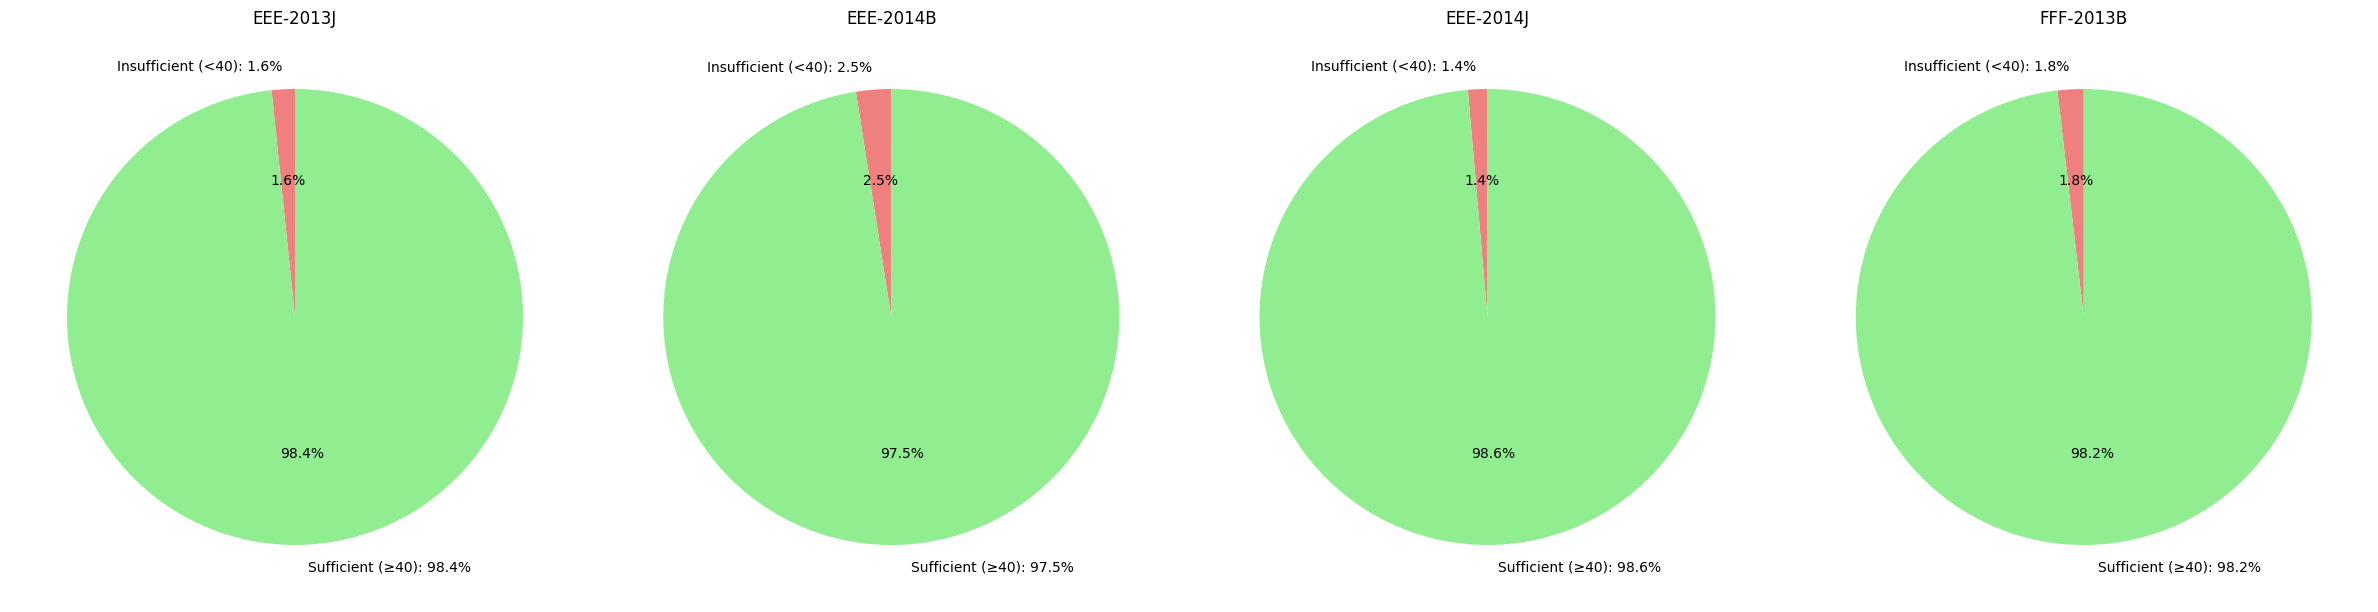

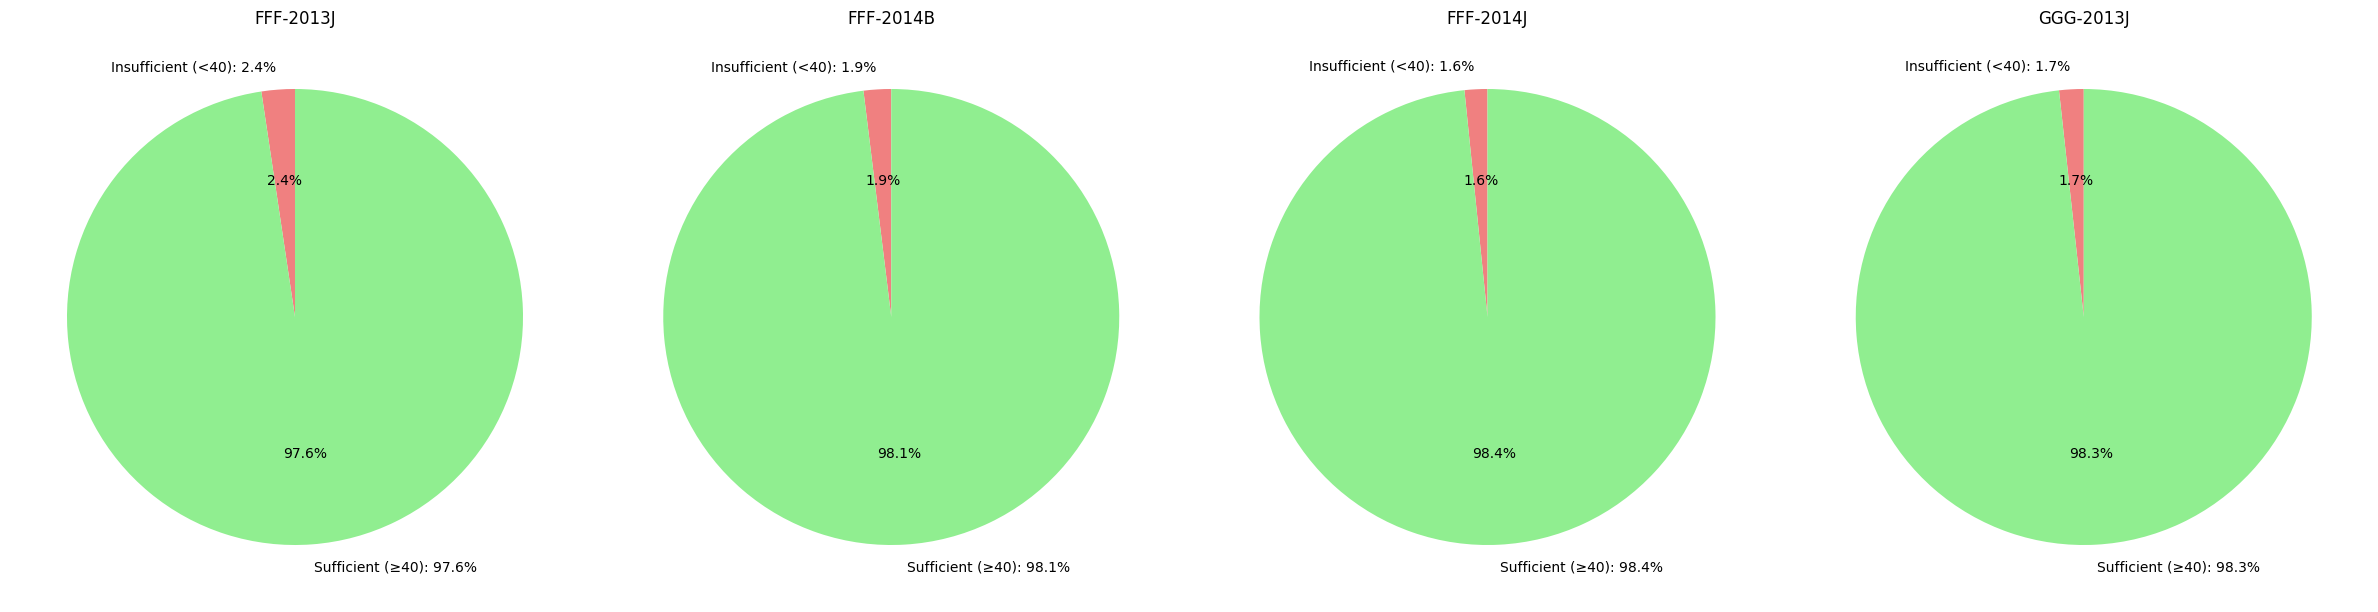

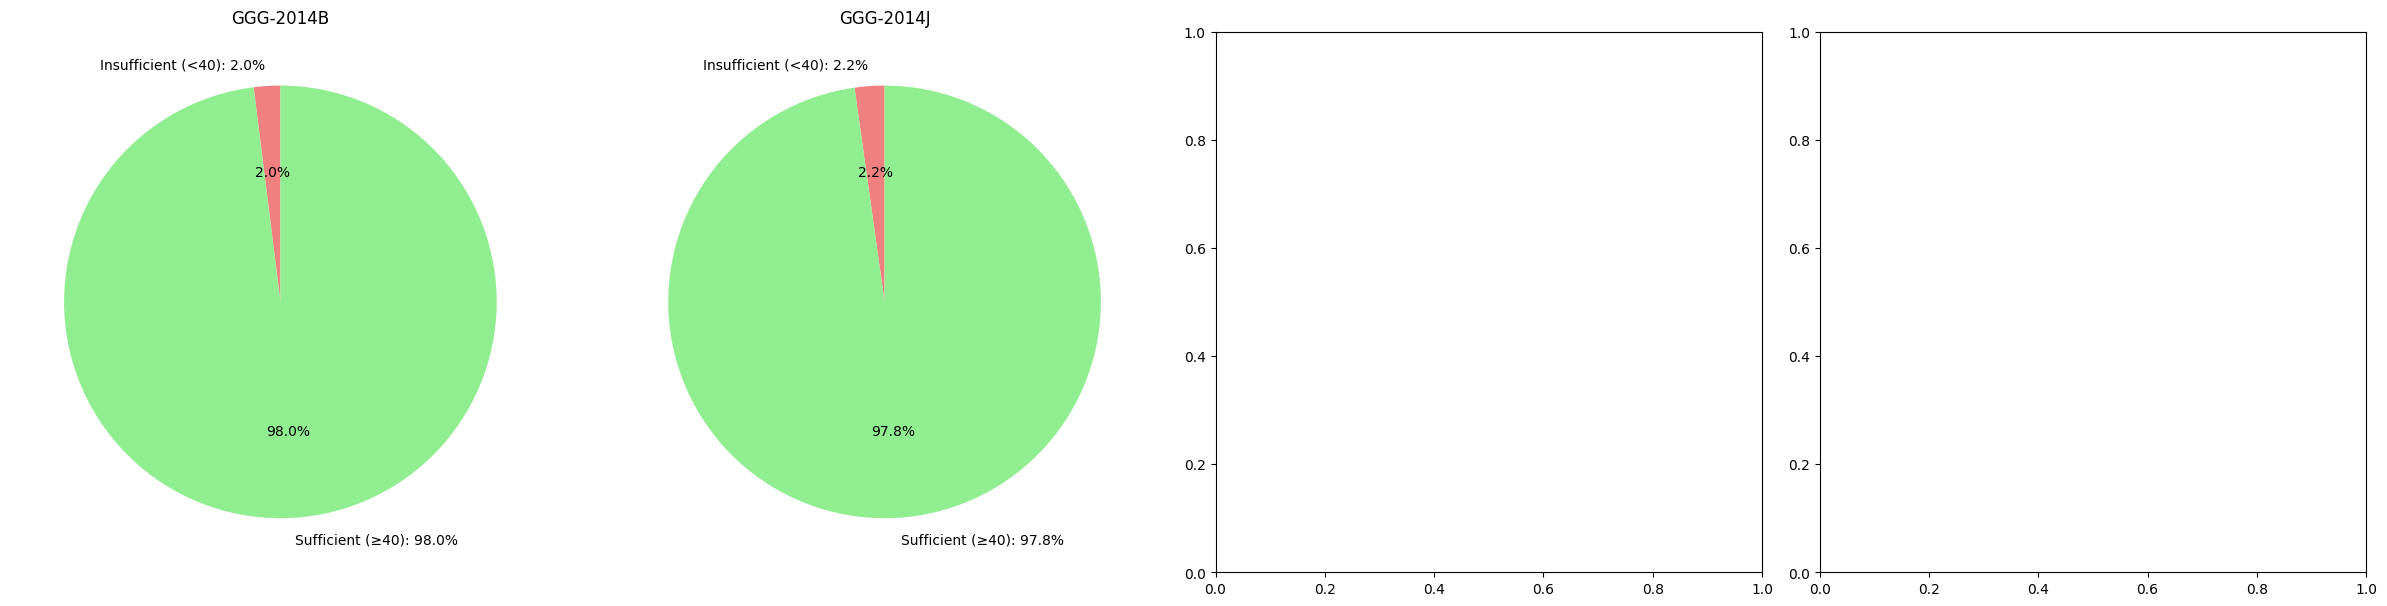

In [48]:
# Step 1: Merge studentAssessment_df with assessments_df to get course and presentation codes
merged_scores_course_df = pd.merge(studentAssessment_df, assessments_df[['id_assessment', 'code_module', 'code_presentation']], on='id_assessment', how='left')

# Step 2: Calculate the number of insufficient scores (<40) per course-presentation
insufficient_counts = merged_scores_course_df[merged_scores_course_df['score'] < 40].groupby(['code_module', 'code_presentation']).size()
total_counts = merged_scores_course_df.groupby(['code_module', 'code_presentation']).size()

# Step 3: Calculate the percentage of insufficient scores
insufficient_percentage = (insufficient_counts / total_counts) * 100
insufficient_percentage = insufficient_percentage.fillna(0)  # Handle NaN values for combinations with no insufficients

# Step 4: Plot pie charts for each course-presentation in a single row (4 at a time)
fig, axes = plt.subplots(1, 4, figsize=(24, 6))

for idx, ((module, presentation), percentage) in enumerate(insufficient_percentage.items()):
    row, col = divmod(idx, 4)  # Calculate the row and column indices for the subplot

    # If we exceed the current row of 4, create a new figure
    if col == 0 and idx != 0:
        plt.tight_layout()
        plt.show()
        fig, axes = plt.subplots(1, 4, figsize=(24, 6))

    # Plot the pie chart in the appropriate subplot
    axes[col].pie([percentage, 100 - percentage], 
                  labels=[f'Insufficient (<40): {percentage:.1f}%', f'Sufficient (≥40): {100 - percentage:.1f}%'], 
                  autopct='%1.1f%%', colors=['lightcoral', 'lightgreen'], startangle=90)
    axes[col].set_title(f'{module}-{presentation}')

# Adjust layout and show the final row of plots
plt.tight_layout()
plt.show()


#### Missing values and duplicates

In [49]:
# Check for missing values
print("Missing Values per Column:")
print(studentAssessment_df.isnull().sum())
print("\n")

Missing Values per Column:
id_assessment       0
id_student          0
date_submitted      0
is_banked           0
score             152
dtype: int64




In [50]:
# Step 1: Filter out rows with missing scores
missing_scores_df = studentAssessment_df[studentAssessment_df['score'].isna()]

# Step 2: Merge with assessments_df to get the assessment type
missing_scores_with_type = pd.merge(missing_scores_df, assessments_df[['id_assessment', 'assessment_type']], on='id_assessment', how='left')

# Step 3: Count missing values per assessment type
missing_counts = missing_scores_with_type['assessment_type'].value_counts()

# Display the counts of missing values per assessment type
print("Missing Scores per Assessment Type:")
print(missing_counts)

# Optional: Display the detailed rows with missing scores and assessment types
print("\nDetailed Rows with Missing Scores:")
print(missing_scores_with_type[['id_assessment', 'id_student', 'assessment_type', 'date_submitted']])


Missing Scores per Assessment Type:
assessment_type
TMA    152
Name: count, dtype: int64

Detailed Rows with Missing Scores:
     id_assessment  id_student assessment_type  date_submitted
0             1752      721259             TMA              22
1             1760     2606802             TMA             180
2            14984      186780             TMA              77
3            14984      531205             TMA              26
4            14984      534151             TMA               7
..             ...         ...             ...             ...
147          34902      489553             TMA             241
148          34903      582670             TMA             241
149          37415      610738             TMA              87
150          37427      631786             TMA             221
151          37435      648110             TMA              62

[152 rows x 4 columns]


All the missing scores are for tutor marked assessments, I will impute the median for that assessment to fill the null-values. It might be that these students have withdrawn before they could recieve their grade for example. 

In [51]:
# Step 1: Calculate the median score per id_assessment
assessment_medians = studentAssessment_df.groupby('id_assessment')['score'].median()

# Step 2: Impute missing scores with the median of the respective id_assessment
studentAssessment_df['score'] = studentAssessment_df.apply(
    lambda row: assessment_medians[row['id_assessment']] if pd.isna(row['score']) else row['score'],
    axis=1
)

In [52]:
# Check for missing values
print("Missing Values per Column:")
print(studentAssessment_df.isnull().sum())
print("\n")

Missing Values per Column:
id_assessment     0
id_student        0
date_submitted    0
is_banked         0
score             0
dtype: int64




In [53]:
# Check for any duplicate rows
duplicates = studentAssessment_df.duplicated()

if duplicates.any():
    print(f"Number of duplicate rows: {duplicates.sum()}")
    print("\nDuplicate rows:")
    print(studentAssessment_df[duplicates])
else:
    print("No duplicate rows found.")


No duplicate rows found.


## Analysis of vle dataframe

#### Data loading

In [54]:
# vle_df = pd.read_csv("../data/vle.csv")

#### Basic information

In [55]:
# Basic information and overview
print("Basic Information:")
print(vle_df.info())
print(vle_df.head())

Basic Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6364 entries, 0 to 6363
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id_site            6364 non-null   int64  
 1   code_module        6364 non-null   object 
 2   code_presentation  6364 non-null   object 
 3   activity_type      6364 non-null   object 
 4   week_from          1121 non-null   float64
 5   week_to            1121 non-null   float64
dtypes: float64(2), int64(1), object(3)
memory usage: 298.4+ KB
None
   id_site code_module code_presentation activity_type  week_from  week_to
0   546943         AAA             2013J      resource        NaN      NaN
1   546712         AAA             2013J     oucontent        NaN      NaN
2   546998         AAA             2013J      resource        NaN      NaN
3   546888         AAA             2013J           url        NaN      NaN
4   547035         AAA             2013J      r

#### Understanding of columns [1]

The csv file contains information about the available materials in the VLE. Typically, these are html pages, pdf files, etc. Students have access to these materials online and their interactions with the materials are recorded.
The vle.csv file contains the following columns:
- id_site: an identification number of the material.
- code_module: an identification code for module.
- code_presentation: the identification code of presentation.
- activity_type: the role associated with the module material.
- week_from: the week from which the material is planned to be used.
- week_to: week until which the material is planned to be used.

#### Distributions

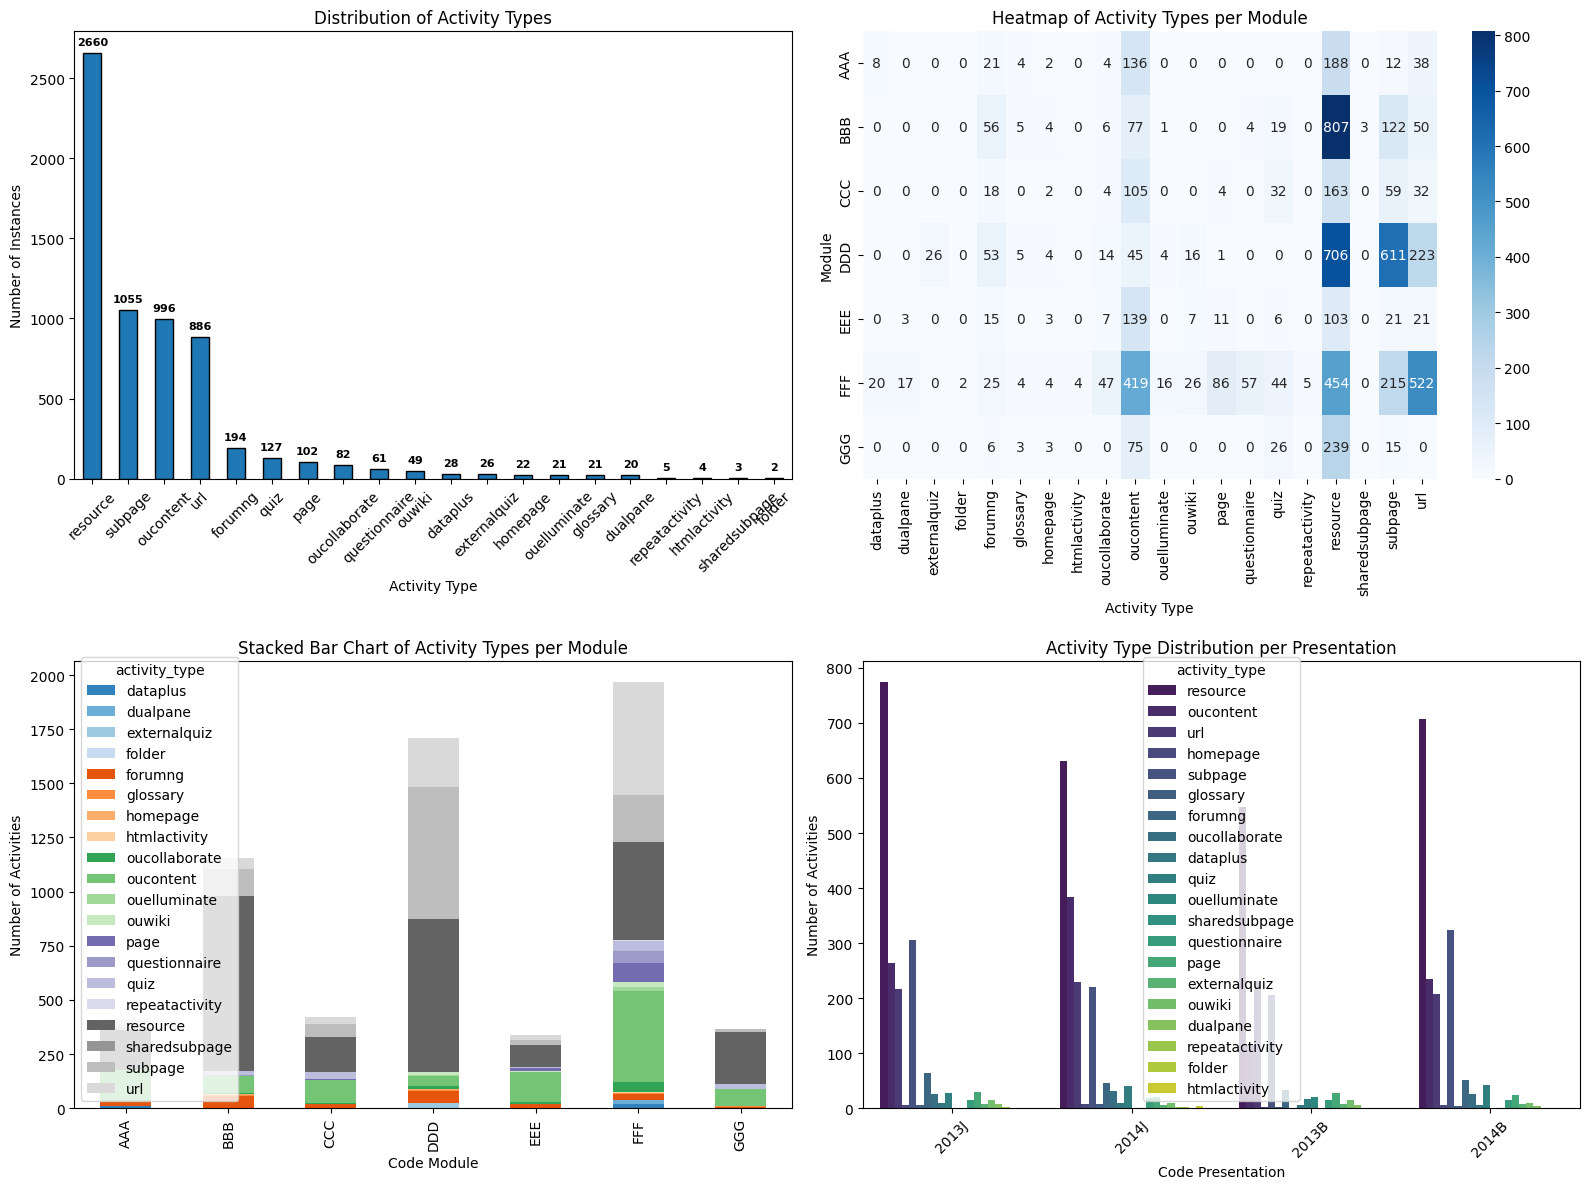

In [56]:
# Create a 2x2 subplot grid
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# Plot 1: Distribution of activity types (Bar Chart)
activity_distribution = vle_df['activity_type'].value_counts()
bars = activity_distribution.plot(kind='bar', edgecolor='black', ax=axes[0, 0])

# Adding numbers on top of each bar
for index, value in enumerate(activity_distribution):
    axes[0, 0].text(index, value + 50, str(value), ha='center', fontsize=8, fontweight='bold')

axes[0, 0].set_title('Distribution of Activity Types')
axes[0, 0].set_xlabel('Activity Type')
axes[0, 0].set_ylabel('Number of Instances')
axes[0, 0].tick_params(axis='x', rotation=45)  # Rotate x-axis labels

# Plot 2: Heatmap of Activity Types per Module
activity_matrix = vle_df.pivot_table(index='code_module', columns='activity_type', aggfunc='size', fill_value=0)
sns.heatmap(activity_matrix, annot=True, cmap='Blues', fmt='d', ax=axes[0, 1])
axes[0, 1].set_title('Heatmap of Activity Types per Module')
axes[0, 1].set_xlabel('Activity Type')
axes[0, 1].set_ylabel('Module')

# Plot 3: Stacked Bar Chart of Activity Types per Module
activity_per_module = vle_df.groupby(['code_module', 'activity_type']).size().unstack(fill_value=0)
activity_per_module.plot(kind='bar', stacked=True, colormap='tab20c', ax=axes[1, 0])
axes[1, 0].set_title('Stacked Bar Chart of Activity Types per Module')
axes[1, 0].set_xlabel('Code Module')
axes[1, 0].set_ylabel('Number of Activities')

# Plot 4: Activity Type Distribution per Presentation (Count Plot)
sns.countplot(data=vle_df, x='code_presentation', hue='activity_type', palette='viridis', ax=axes[1, 1])
axes[1, 1].set_title('Activity Type Distribution per Presentation')
axes[1, 1].set_xlabel('Code Presentation')
axes[1, 1].set_ylabel('Number of Activities')
axes[1, 1].tick_params(axis='x', rotation=45)

# Adjust layout
plt.tight_layout()
plt.show()


#### Missing values and duplicates

In [57]:
# Check for missing values
print("Missing Values per Column:")
print(vle_df.isnull().sum())
print("\n")

Missing Values per Column:
id_site                 0
code_module             0
code_presentation       0
activity_type           0
week_from            5243
week_to              5243
dtype: int64




I notice that the number of sites without week_from or week_to is very large. This probably means there are no restrictions on when these sites can be accessed. and therefore they are not time-bound. 

In [58]:
# Filter non-null week data and calculate basic stats
non_null_weeks = vle_df.dropna(subset=['week_from', 'week_to'])

# Week range statistics
week_stats = {
    'week_from': {
        'Min': non_null_weeks['week_from'].min(),
        'Max': non_null_weeks['week_from'].max(),
        'Average': non_null_weeks['week_from'].mean()
    },
    'week_to': {
        'Min': non_null_weeks['week_to'].min(),
        'Max': non_null_weeks['week_to'].max(),
        'Average': non_null_weeks['week_to'].mean()
    }
}
print("Week Range Statistics:")
for week, stats in week_stats.items():
    print(f"{week.capitalize()}:")
    for stat, value in stats.items():
        print(f"  {stat}: {value:.2f}")
    print("\n")

Week Range Statistics:
Week_from:
  Min: 0.00
  Max: 29.00
  Average: 15.20


Week_to:
  Min: 0.00
  Max: 29.00
  Average: 15.21




In [59]:
# Drop rows with missing values in week_from and week_to
week_df = vle_df.dropna(subset=['week_from', 'week_to']).copy()

# Calculate the difference between start and end weeks
week_df.loc[:, 'week_diff'] = week_df['week_to'] - week_df['week_from']

# Basic statistics on the week difference
week_diff_stats = {
    'Min Difference': week_df['week_diff'].min(),
    'Max Difference': week_df['week_diff'].max(),
    'Average Difference': week_df['week_diff'].mean(),
    'Standard Deviation': week_df['week_diff'].std(),
    'Number of Unique Differences': week_df['week_diff'].nunique(),
}

# Print statistics
print("Statistics on Week Difference:")
for stat, value in week_diff_stats.items():
    print(f"  {stat}: {value:.2f}")

# Check unique differences
unique_diffs = week_df['week_diff'].value_counts()
print("\nUnique Week Differences:")
print(unique_diffs)

Statistics on Week Difference:
  Min Difference: 0.00
  Max Difference: 2.00
  Average Difference: 0.01
  Standard Deviation: 0.12
  Number of Unique Differences: 3.00

Unique Week Differences:
week_diff
0.0    1111
1.0       8
2.0       2
Name: count, dtype: int64


I see that the difference between week_from and week_to column is usually 0 with 11 site restrictions that are either 1 or 2 weeks. Since the most important thing to note about these sites is that they are time restricted, I will add a binary column to eliminate the null values.. The 'time_bound'column will be 0 for the sites that do not have a time-bound and 1 for the sites that do.

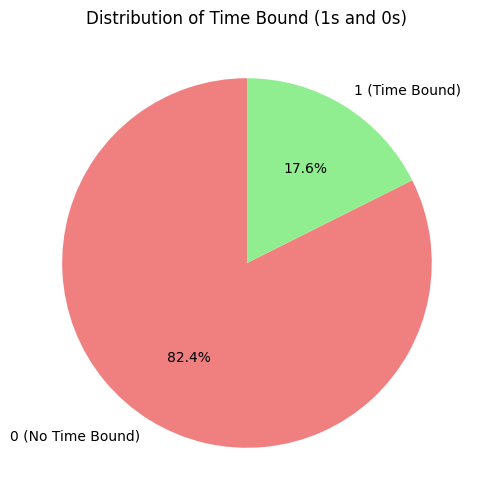

In [60]:
# Create the 'time_bound' column based on the presence of values in 'week_from' and 'week_to'
vle_df['time_bound'] = np.where(vle_df['week_from'].notnull() & vle_df['week_to'].notnull(), 1, 0)

# Count the number of ones and zeros in the 'time_bound' column
time_bound_counts = vle_df['time_bound'].value_counts()

# Create a pie chart
plt.figure(figsize=(6, 6))
plt.pie(time_bound_counts, labels=['0 (No Time Bound)', '1 (Time Bound)'], autopct='%1.1f%%', startangle=90, colors=['lightcoral', 'lightgreen'])
plt.title('Distribution of Time Bound (1s and 0s)')
plt.show()


In [61]:
# Drop the 'week_from' and 'week_to' columns
vle_df.drop(columns=['week_from', 'week_to'], inplace=True)

# Verify that the columns have been removed
print("Dataset after dropping 'week_from' and 'week_to':")
print(vle_df.head())


Dataset after dropping 'week_from' and 'week_to':
   id_site code_module code_presentation activity_type  time_bound
0   546943         AAA             2013J      resource           0
1   546712         AAA             2013J     oucontent           0
2   546998         AAA             2013J      resource           0
3   546888         AAA             2013J           url           0
4   547035         AAA             2013J      resource           0


In [62]:
# Check for missing values
print("Missing Values per Column:")
print(vle_df.isnull().sum())
print("\n")

Missing Values per Column:
id_site              0
code_module          0
code_presentation    0
activity_type        0
time_bound           0
dtype: int64




In [63]:
# Check for any duplicate rows
duplicates = vle_df.duplicated()

if duplicates.any():
    print(f"Number of duplicate rows: {duplicates.sum()}")
    print("\nDuplicate rows:")
    print(vle_df[duplicates])
else:
    print("No duplicate rows found.")


No duplicate rows found.


## Analysis of student vle dataframe

In [64]:
# studentVle_df = pd.read_csv("../data/studentVle.csv")

#### Basic information

In [65]:
# Basic information and overview
print("Basic Information:")
print(studentVle_df.info())
print(studentVle_df.head())

Basic Information:
<class 'pandas.core.frame.DataFrame'>
Index: 10323678 entries, 0 to 10655279
Data columns (total 6 columns):
 #   Column             Dtype 
---  ------             ----- 
 0   code_module        object
 1   code_presentation  object
 2   id_student         int64 
 3   id_site            int64 
 4   date               int64 
 5   sum_click          int64 
dtypes: int64(4), object(2)
memory usage: 551.3+ MB
None
  code_module code_presentation  id_student  id_site  date  sum_click
0         AAA             2013J       28400   546652   -10          4
1         AAA             2013J       28400   546652   -10          1
2         AAA             2013J       28400   546652   -10          1
3         AAA             2013J       28400   546614   -10         11
4         AAA             2013J       28400   546714   -10          1


#### Understanding of columns [1]

The studentVle.csv file contains information about each student's interactions with the materials in the VLE.
This file contains the following columns:
- code_module: an identification code for a module.
- code_presentation: the identification code of the module presentation.
- id_student: a unique identification number for the student.
- id_site: an identification number for the VLE material.
- date: the date of student's interaction with the material measured as the number of days since the start of the module-presentation.
- sum_click: the number of times a student interacts with the material in that day.

#### Distributions

Since I won't do anything in specific with the days on which the clicks will occur, but rather focus on the number of clicks per site I will first aggregate the data to get a more clear dataframe. After that we will look at the distributions. 

In [66]:
# 1) Merge in activity_type by id_site
studentVle_merged = studentVle_df.merge(
    vle_df[['id_site','activity_type']],
    on='id_site',
    how='left'
)

# 2) Select only the fields we care about
studentVle_full = studentVle_merged[[
    'code_module','code_presentation','id_student',
    'activity_type','date','sum_click'
]]

# 3) Aggregate clicks per day per activity_type
studentVle_full = (
    studentVle_full
      .groupby(
          ['code_module','code_presentation','id_student','activity_type','date'],
          as_index=False
      )
      .agg(sum_click=('sum_click','sum'))
)

# 4) Inspect
print("studentVle_full (per‐day) — shape:", studentVle_full.shape)
print(studentVle_full.head())


studentVle_full (per‐day) — shape: (5234682, 6)
  code_module code_presentation  id_student activity_type  date  sum_click
0         AAA             2013J       11391       forumng    -5          2
1         AAA             2013J       11391       forumng     0         15
2         AAA             2013J       11391       forumng     1          3
3         AAA             2013J       11391       forumng    18         35
4         AAA             2013J       11391       forumng    30          2


In [67]:
# 1) Group by activity_type to aggregate across days
studentVle_aggregated = (
    studentVle_full
      .groupby(
          ['code_module','code_presentation','id_student','activity_type'],
          as_index=False
      )
      .agg(
          sum_click=('sum_click','sum'),
          first_click_day=('date','min'),
          last_click_day=('date','max'),
          click_days=('date','nunique')
      )
)

# 2) Inspect
print("studentVle_aggregated (per‐activity) — shape:", studentVle_aggregated.shape)
print(studentVle_aggregated.head())


studentVle_aggregated (per‐activity) — shape: (225195, 8)
  code_module code_presentation  id_student activity_type  sum_click  \
0         AAA             2013J       11391       forumng        193   
1         AAA             2013J       11391      homepage        138   
2         AAA             2013J       11391     oucontent        553   
3         AAA             2013J       11391      resource         13   
4         AAA             2013J       11391       subpage         32   

   first_click_day  last_click_day  click_days  
0               -5             245          19  
1               -5             253          40  
2               -5             242          23  
3                0             241           7  
4               -5             222          10  


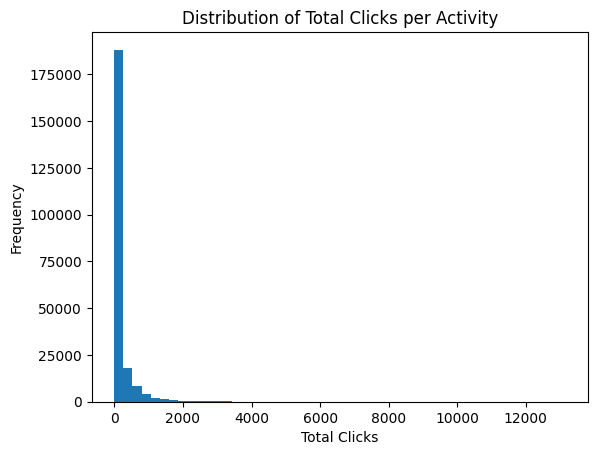

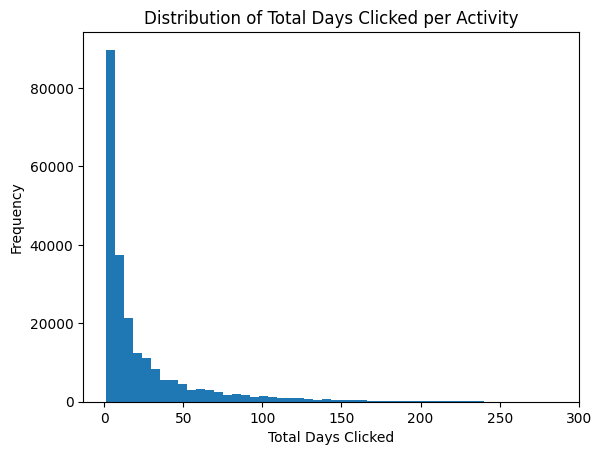

In [68]:
# Histogram of total clicks per activity
plt.figure()
plt.hist(studentVle_aggregated['sum_click'], bins=50)
plt.title('Distribution of Total Clicks per Activity')
plt.xlabel('Total Clicks')
plt.ylabel('Frequency')
plt.show()

# Histogram of total days clicked per activity
plt.figure()
plt.hist(studentVle_aggregated['click_days'], bins=50)
plt.title('Distribution of Total Days Clicked per Activity')
plt.xlabel('Total Days Clicked')
plt.ylabel('Frequency')
plt.show()


In [69]:
# # Merge to include activity_type and time_bound info from vle
# studentVle_merged = studentVle_df.merge(
#     vle_df[['id_site', 'code_module', 'code_presentation', 'activity_type', 'time_bound']],
#     on=['id_site', 'code_module', 'code_presentation'],
#     how='left'
# )

# # Aggregating total clicks per activity_type per student
# aggregated_studentVle_df = studentVle_merged.groupby(
#     ['code_module', 'code_presentation', 'id_student', 'activity_type'], as_index=False
# ).agg(
#     sum_click=('sum_click', 'sum'),
#     first_click_day=('date', 'min'),
#     last_click_day=('date', 'max'),
#     time_bound=('time_bound', 'max')  # assuming if any part of it is time_bound, we keep it
# )

# # Add click_span column
# aggregated_studentVle_df['click_span'] = (
#     aggregated_studentVle_df['last_click_day'] - aggregated_studentVle_df['first_click_day']
# )

# # Basic information and overview
# print("Basic Information (aggregated per activity_type):")
# print(aggregated_studentVle_df.info())
# print(aggregated_studentVle_df.head())


#### Missing values and duplicates

In [70]:
# Check for missing values
print("Missing Values per Column in clicks per day:")
print(studentVle_full.isnull().sum())
print("\n")

Missing Values per Column in clicks per day:
code_module          0
code_presentation    0
id_student           0
activity_type        0
date                 0
sum_click            0
dtype: int64




In [71]:
# Check for missing values
print("Missing Values per Column in clicks per day:")
print(studentVle_aggregated.isnull().sum())
print("\n")

Missing Values per Column in clicks per day:
code_module          0
code_presentation    0
id_student           0
activity_type        0
sum_click            0
first_click_day      0
last_click_day       0
click_days           0
dtype: int64




In [72]:
# Check for any duplicate rows
duplicates = studentVle_full.duplicated()

if duplicates.any():
    print(f"Number of duplicate rows: {duplicates.sum()}")
    print("\nDuplicate rows:")
    print(studentVle_full[duplicates])
else:
    print("No duplicate rows found.")


No duplicate rows found.


In [73]:
# Check for any duplicate rows
duplicates = studentVle_aggregated.duplicated()

if duplicates.any():
    print(f"Number of duplicate rows: {duplicates.sum()}")
    print("\nDuplicate rows:")
    print(studentVle_aggregated[duplicates])
else:
    print("No duplicate rows found.")


No duplicate rows found.


## Save datasets

In [74]:
courses_df.to_csv("../data/clean/courses.csv", index=False)
assessments_df.to_csv("../data/clean/assessments.csv", index=False)
studentInfo_df.to_csv("../data/clean/studentInfo.csv", index=False)
studentRegistration_df.to_csv("../data/clean/studentRegistration.csv", index=False)
studentAssessment_df.to_csv("../data/clean/studentAssessment.csv", index=False)
vle_df.to_csv("../data/clean/vle.csv", index=False)
studentVle_full.to_csv("../data/clean/studentVle.csv", index=False)
studentVle_aggregated.to_csv("../data/clean/studentVle_aggregated.csv", index=False)
